In [65]:
# reading GSE143272 txt file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Read data with proper NA handling
df = pd.read_csv(
    "/Users/tabish/Desktop/Data Science project/GSE143272_series_matrix.txt",
    sep="\t",
    comment="!",
    engine="python"
    )

print(df)
print("Shape of dataset:", df.shape)
print("First 5 rows:")
print(df.head())

             ID_REF  GSM4255766  GSM4255767  GSM4255768  GSM4255769  GSM4255770  GSM4255771  GSM4255772  GSM4255773  GSM4255774  ...  GSM4255898  GSM4255899  GSM4255900  GSM4255901  GSM4255902  \
0      ILMN_1343291   12.649475   12.786648   12.747869   12.882184   12.848514   12.801818   12.924486   12.906179   12.784173  ...   12.852601   12.825128   13.010292   12.755244   12.979969   
1      ILMN_1343295    9.068705    9.046743    9.173225    9.194447    8.949259    9.437087    9.311636    9.097799    9.338172  ...    9.088271    9.797355    9.665235    9.318582    8.968257   
2      ILMN_1651228   11.259794   11.365609   11.111931   10.249910   10.879698   11.123208   10.961137   11.129600   11.149578  ...   11.493809   11.154903   10.869745   10.840310   10.060365   
3      ILMN_1651229    4.376295    3.941682    4.415729    4.347361    4.407615    4.295823    4.603696    4.472261    4.334274  ...    4.586801    3.977183    4.336415    4.477167    4.480165   
4      ILMN_1651254 

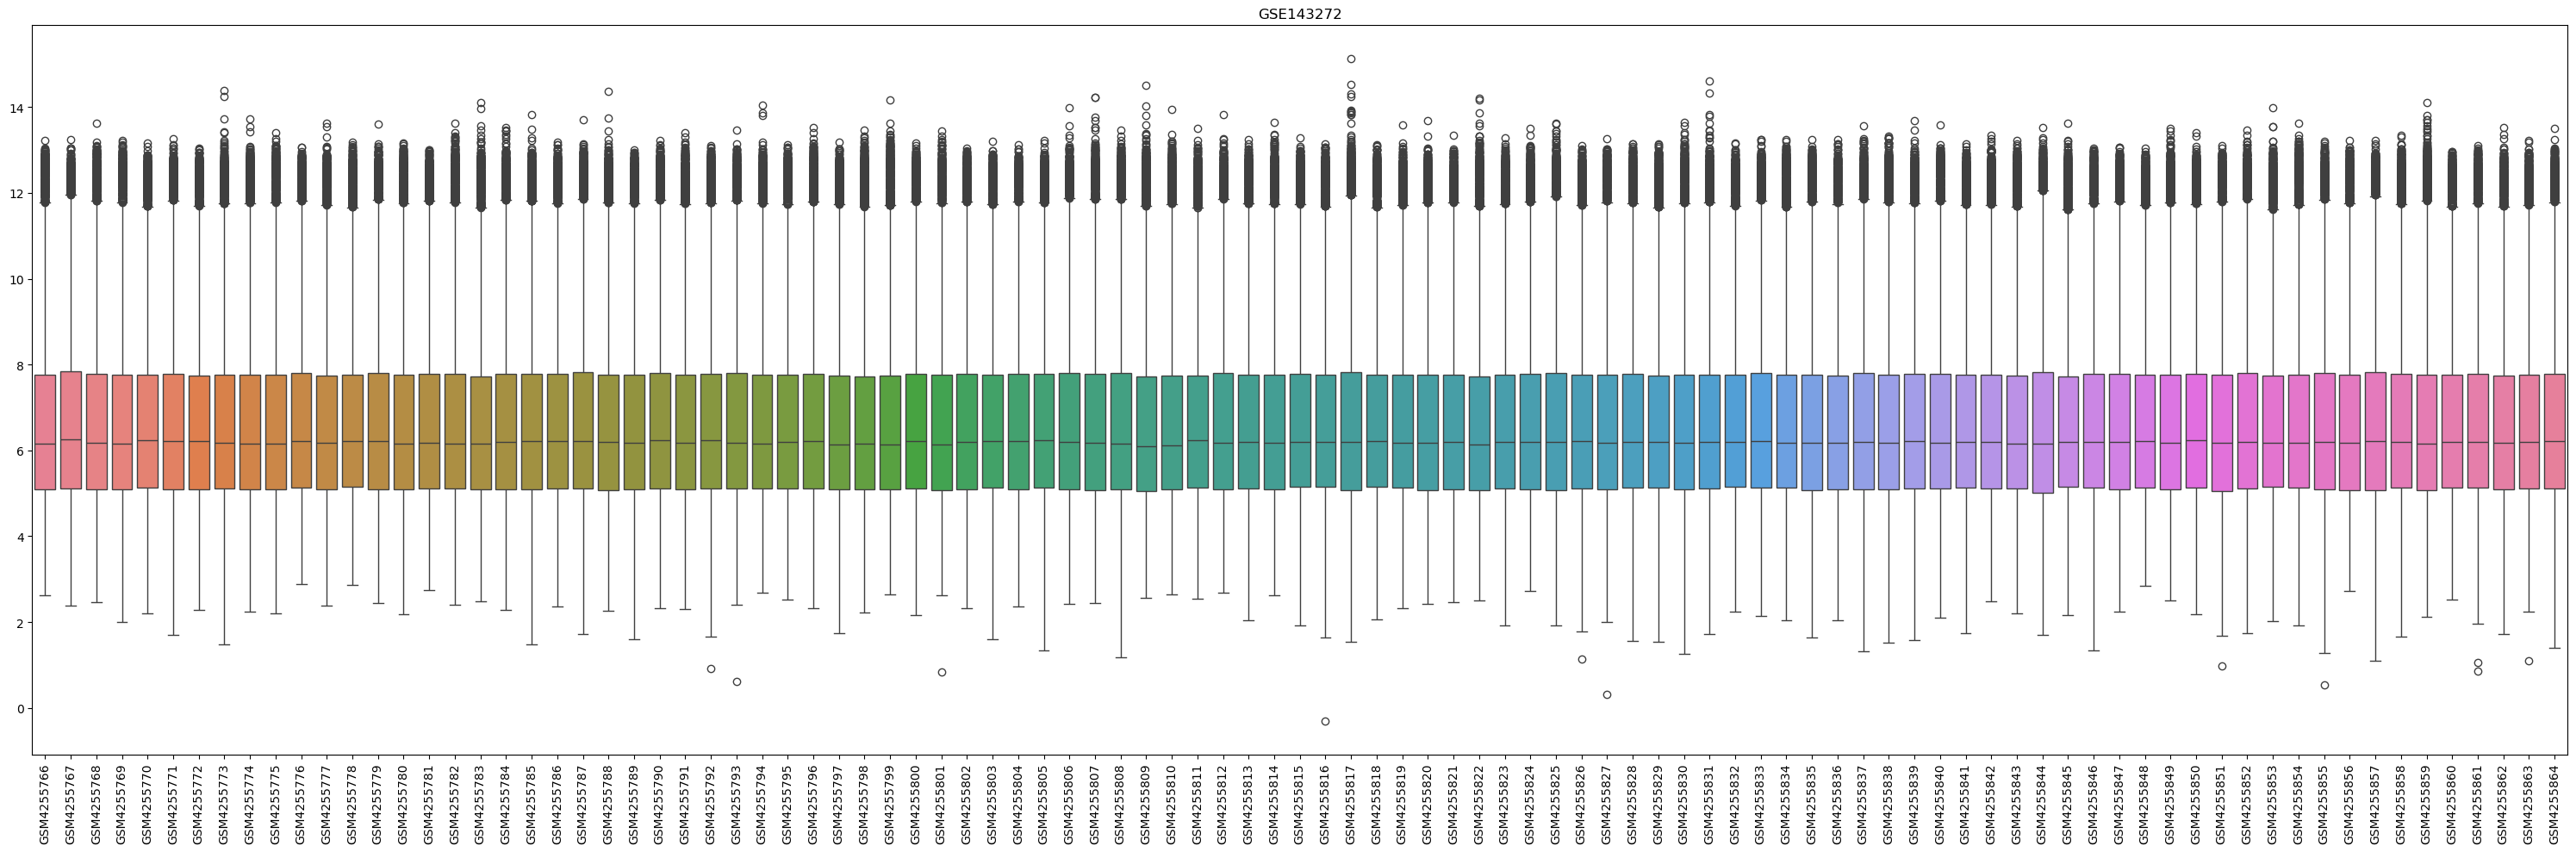

In [170]:
# Plotting boxplot for ILMN gene
plt.figure(figsize=(30, 10))
sns.boxplot(data=df.iloc[:, :100])
plt.xticks(rotation=90)
plt.title('GSE143272')
plt.tight_layout()  # Prevents label cutoff

plt.savefig("Boxplot_of_sample.png", dpi=300, bbox_inches="tight")
plt.show()

#plt.figure(figsize=(10, 5))
#sns.boxplot(data=ml_df.iloc[:, :100])   # first 100 genes only


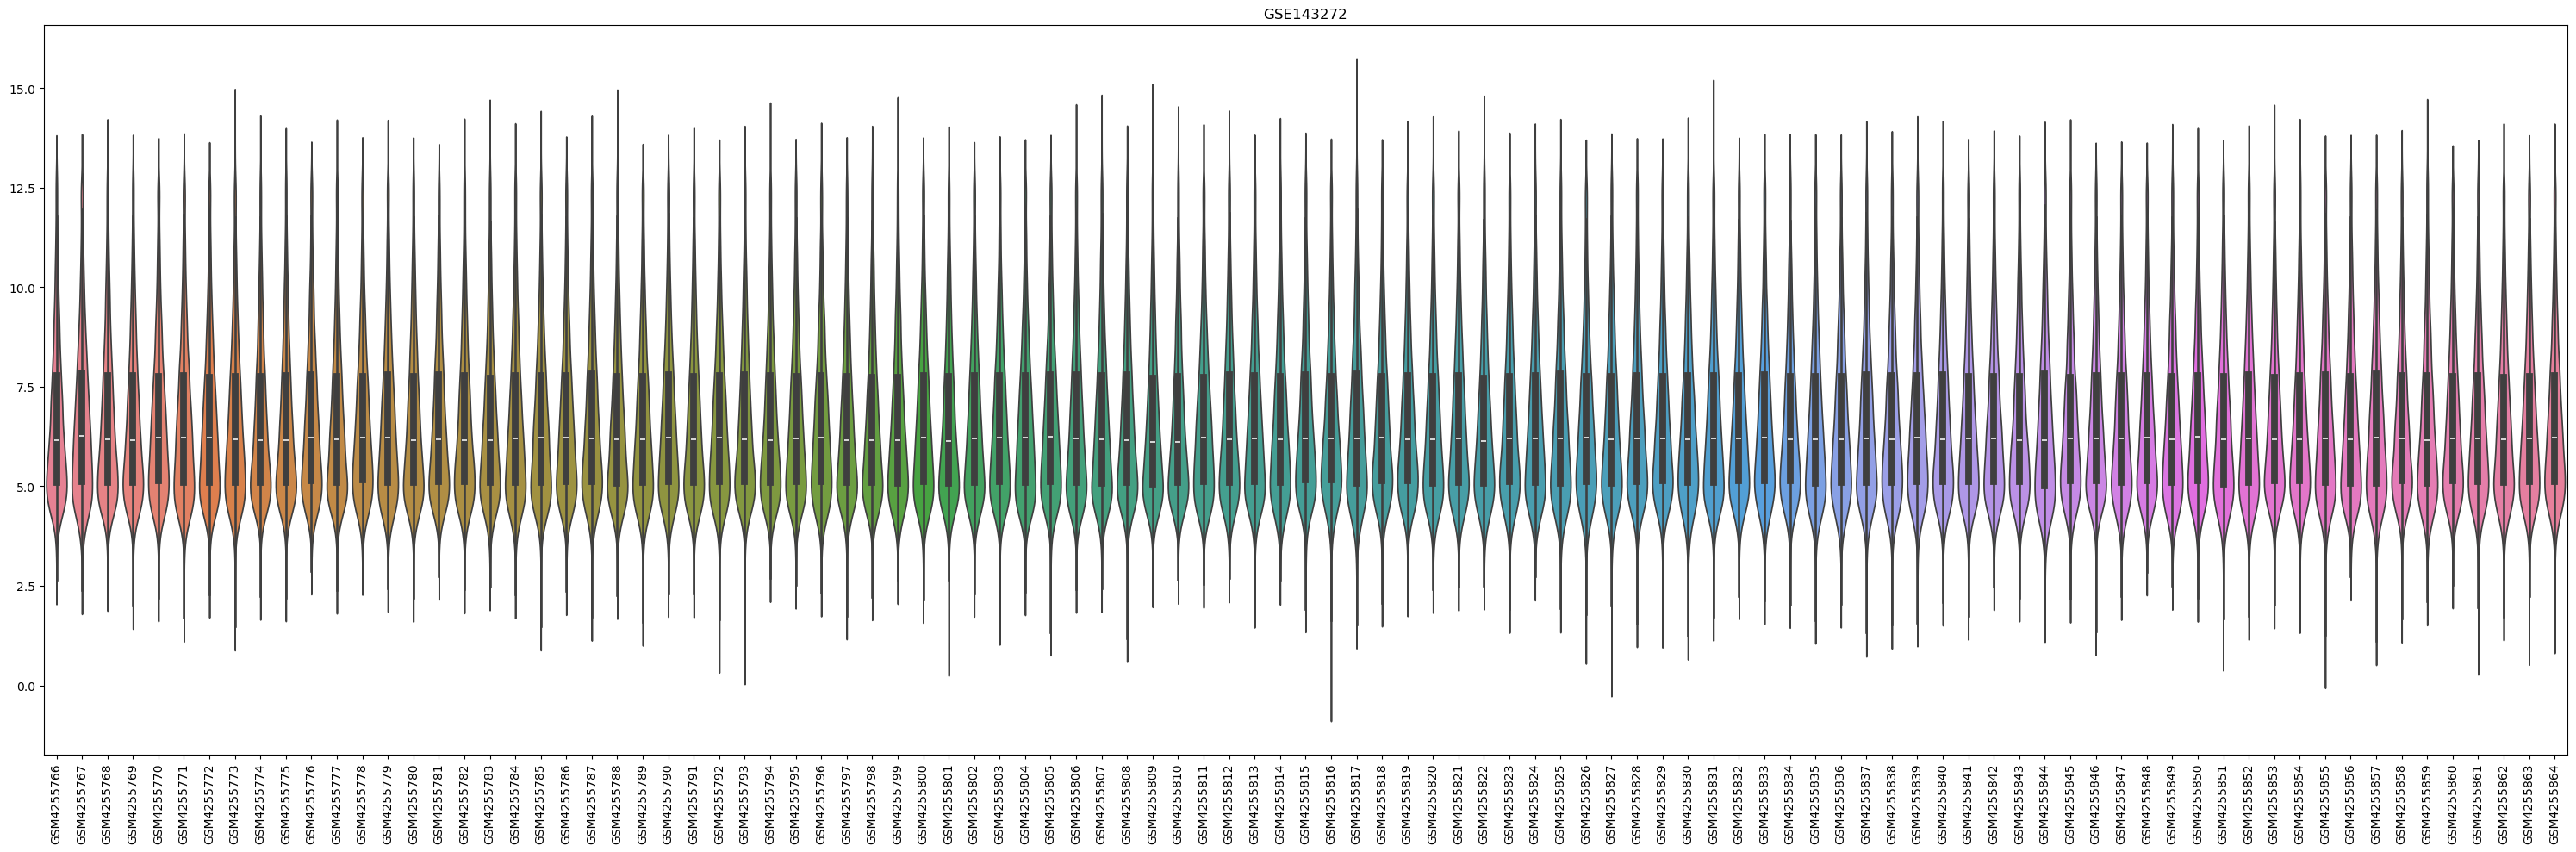

In [176]:
plt.figure(figsize=(30, 10))
sns.violinplot(data=df.iloc[:, :100])
plt.xticks(rotation=90)
plt.title('GSE143272')
plt.tight_layout()  # Prevents label cutoff

#plt.savefig("Boxplot_of_sample.png", dpi=300, bbox_inches="tight")
plt.show()

### Mapping metadata from txt file

In [69]:
# Mapping metadata from txt file
# Read the SOFT file as plain text
meta_file = "/Users/tabish/Desktop/Data Science project/GSE143272_series_matrix.txt"

sample_info = {}
with open(meta_file, "r") as f:
    lines = f.readlines()

sample_ids = []
titles = []
chars = []

for line in lines:
    if line.startswith("!Sample_geo_accession"):
        sample_ids = line.strip().split("\t")[1:]   # All GSM IDs
    elif line.startswith("!Sample_title"):
        titles = line.strip().split("\t")[1:]       # Titles (contain condition info)
    elif line.startswith("!Sample_characteristics_ch1"):
        chars.append(line.strip().split("\t")[1:])  # Additional metadata

# Build phenotype dataframe
meta_df = pd.DataFrame({"SampleID": sample_ids, "Title": titles})

# Add characteristics as extra columns
for i, row in enumerate(chars):
    meta_df[f"Characteristic_{i+1}"] = row

print("Metadata shape:", meta_df.shape)
print(meta_df.head())

# Save metadata for inspection
meta_df.to_csv("labels.csv", index=False)


Metadata shape: (142, 8)
       SampleID                 Title      Characteristic_1 Characteristic_2              Characteristic_3         Characteristic_4                Characteristic_5           Characteristic_6
0  "GSM4255766"  "Healthy Control-21"  "age (in years): 26"    "Sex: Female"            "epilepsy type: -"           "treatment: -"              "drug response: -"  "ethnicity: North Indian"
1  "GSM4255767"  "VA Non-responder-1"  "age (in years): 28"      "Sex: Male"   "epilepsy type: Idiopathic"   "treatment: Valproate"  "drug response: Non-responder"  "ethnicity: North Indian"
2  "GSM4255768"  "Healthy Control-31"  "age (in years): 29"      "Sex: Male"            "epilepsy type: -"           "treatment: -"              "drug response: -"  "ethnicity: North Indian"
3  "GSM4255769"  "Healthy Control-22"  "age (in years): 28"      "Sex: Male"            "epilepsy type: -"           "treatment: -"              "drug response: -"  "ethnicity: North Indian"
4  "GSM4255770"    "

### clean labels

In [71]:
# extracting condition from Title
meta_df["Condition"] = meta_df["Title"].apply(
    lambda x: "Control" if "Healthy" in x else "Epilepsy"
)

# Extract drug and response info
meta_df["Drug"] = meta_df["Title"].apply(
    lambda x: "CBZ" if "CBZ" in x else ("VA" if "VA" in x else ("PHT" if "PHT" in x else "None"))
)

meta_df["Response"] = meta_df["Title"].apply(
    lambda x: "Responder" if "responder" in x.lower() else ("Non-responder" if "non responder" in x.lower() else "NA")
)

print(meta_df.head(10))


       SampleID                 Title      Characteristic_1 Characteristic_2              Characteristic_3         Characteristic_4                Characteristic_5           Characteristic_6  \
0  "GSM4255766"  "Healthy Control-21"  "age (in years): 26"    "Sex: Female"            "epilepsy type: -"           "treatment: -"              "drug response: -"  "ethnicity: North Indian"   
1  "GSM4255767"  "VA Non-responder-1"  "age (in years): 28"      "Sex: Male"   "epilepsy type: Idiopathic"   "treatment: Valproate"  "drug response: Non-responder"  "ethnicity: North Indian"   
2  "GSM4255768"  "Healthy Control-31"  "age (in years): 29"      "Sex: Male"            "epilepsy type: -"           "treatment: -"              "drug response: -"  "ethnicity: North Indian"   
3  "GSM4255769"  "Healthy Control-22"  "age (in years): 28"      "Sex: Male"            "epilepsy type: -"           "treatment: -"              "drug response: -"  "ethnicity: North Indian"   
4  "GSM4255770"    "Drug-naïve

### merge metadata with expression data

In [73]:
# Transpose expression data so samples = rows
df_t = df.set_index("ID_REF").T
df_t.index.name = "SampleID"
df_t.reset_index(inplace=True)

# Merge with metadata
full_df = meta_df.merge(df_t, on="SampleID")

print("Final dataset shape:", full_df.shape)
print(full_df.iloc[:5, :10])  # show first few genes + metadata

# Save full dataset for ML
full_df.to_csv("epilepsy_dataset.csv", index=False)

Final dataset shape: (0, 13176)
Empty DataFrame
Columns: [SampleID, Title, Characteristic_1, Characteristic_2, Characteristic_3, Characteristic_4, Characteristic_5, Characteristic_6, Condition, Drug]
Index: []


In [75]:

import numpy as np

# Display full table in Jupyter nicely
from IPython.display import display


# Assume your metadata is already read as meta_df
# Remove quotes and extra spaces from all string columns
for col in meta_df.select_dtypes(include="object").columns:
    meta_df[col] = meta_df[col].str.replace('"', '').str.strip()

# Extract Condition from Title
meta_df["Condition"] = meta_df["Title"].apply(lambda x: "Control" if "Healthy" in x else "Epilepsy")

# Extract Drug from Title
meta_df["Drug"] = meta_df["Title"].apply(
    lambda x: "CBZ" if "CBZ" in x else ("VA" if "VA" in x else ("PHT" if "PHT" in x else "None"))
)

# Extract Drug Response from Title
#meta_df["Drug Response"] = meta_df["Title"].apply(
 #   lambda x: "Responder" if "responder" in x.lower() else ("Non-responder" if "non-responder" in x.lower() else "-")
#)
meta_df["Drug Response"] = meta_df["Title"].apply(
    lambda x: "Non-responder" if "non-responder" in x.lower() else (
        "Responder" if "responder" in x.lower() else np.nan
    )
)


# Clean Age and Sex columns from Characteristic_1 and Characteristic_2
meta_df["Age"] = meta_df["Characteristic_1"].str.replace(r"age \(in years\):", "").str.strip()
meta_df["Sex"] = meta_df["Characteristic_2"].str.replace(r"Sex:", "").str.strip()

# Clean Epilepsy Type and Treatment columns from Characteristic_3 and Characteristic_4
meta_df["Epilepsy Type"] = meta_df["Characteristic_3"].str.replace(r"epilepsy type:", "").str.strip()
meta_df["Treatment"] = meta_df["Characteristic_4"].str.replace(r"treatment:", "").str.strip()

# Keep only the columns you want and remove Ethnicity
final_meta = meta_df[["SampleID", "Title", "Epilepsy Type", "Treatment", "Drug Response",
                      "Condition", "Drug", "Age", "Sex"]]

# Replace hyphen "-" with NA
final_meta.replace("-", np.nan, inplace=True)

# Reset index
final_meta.reset_index(drop=True, inplace=True)


print(final_meta.head(10))
display(final_meta)


     SampleID               Title Epilepsy Type   Treatment  Drug Response Condition  Drug                 Age     Sex
0  GSM4255766  Healthy Control-21           NaN         NaN            NaN   Control  None  age (in years): 26  Female
1  GSM4255767  VA Non-responder-1    Idiopathic   Valproate  Non-responder  Epilepsy    VA  age (in years): 28    Male
2  GSM4255768  Healthy Control-31           NaN         NaN            NaN   Control  None  age (in years): 29    Male
3  GSM4255769  Healthy Control-22           NaN         NaN            NaN   Control  None  age (in years): 28    Male
4  GSM4255770    Drug-naïve_SE-16   Symptomatic  Drug-naïve            NaN  Epilepsy  None  age (in years): 32    Male
5  GSM4255771      VA Responder-1    Idiopathic   Valproate      Responder  Epilepsy    VA  age (in years): 27  Female
6  GSM4255772  Healthy Control-26           NaN         NaN            NaN   Control  None  age (in years): 22  Female
7  GSM4255773  VA Non-responder-2    Idiopathic 

/var/folders/5c/dt9mwqm92d73ytztv803xhvr0000gn/T/ipykernel_39455/2033538552.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_meta.replace("-", np.nan, inplace=True)


,SampleID,Title,Epilepsy Type,Treatment,Drug Response,Condition,Drug,Age,Sex
0,GSM4255766,Healthy Control-21,NaN,NaN,NaN,Control,None,age (in years): 26,Female
1,GSM4255767,VA Non-responder-1,Idiopathic,Valproate,Non-responder,Epilepsy,VA,age (in years): 28,Male
2,GSM4255768,Healthy Control-31,NaN,NaN,NaN,Control,None,age (in years): 29,Male
3,GSM4255769,Healthy Control-22,NaN,NaN,NaN,Control,None,age (in years): 28,Male
4,GSM4255770,Drug-naïve_SE-16,Symptomatic,Drug-naïve,NaN,Epilepsy,None,age (in years): 32,Male
...,...,...,...,...,...,...,...,...,...
137,GSM4255903,VA Responder-13,Idiopathic,Valproate,Responder,Epilepsy,VA,age (in years): 26,Female
138,GSM4255904,CBZ Non-responder-9,Idiopathic,Carbamazepine,Non-responder,Epilepsy,CBZ,age (in years): 21,Female
139,GSM4255905,VA Responder-14,Idiopathic,Valproate,Responder,Epilepsy,VA,age (in years): 23,Male
140,GSM4255906,VA Responder-15,Idiopathic,Valproate,Responder,Epilepsy,VA,age (in years): 31,Male


In [77]:


# Remove the text "age in years:" and any extra spaces
final_meta["Age"] = final_meta["Age"].str.replace("age (in years):", "").str.strip()

# Convert to numeric
final_meta["Age"] = pd.to_numeric(final_meta["Age"])

# Display nicely in Jupyter
from IPython.display import display
display(final_meta)


/var/folders/5c/dt9mwqm92d73ytztv803xhvr0000gn/T/ipykernel_39455/3583610128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_meta["Age"] = final_meta["Age"].str.replace("age (in years):", "").str.strip()
/var/folders/5c/dt9mwqm92d73ytztv803xhvr0000gn/T/ipykernel_39455/3583610128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_meta["Age"] = pd.to_numeric(final_meta["Age"])


,SampleID,Title,Epilepsy Type,Treatment,Drug Response,Condition,Drug,Age,Sex
0,GSM4255766,Healthy Control-21,NaN,NaN,NaN,Control,None,26,Female
1,GSM4255767,VA Non-responder-1,Idiopathic,Valproate,Non-responder,Epilepsy,VA,28,Male
2,GSM4255768,Healthy Control-31,NaN,NaN,NaN,Control,None,29,Male
3,GSM4255769,Healthy Control-22,NaN,NaN,NaN,Control,None,28,Male
4,GSM4255770,Drug-naïve_SE-16,Symptomatic,Drug-naïve,NaN,Epilepsy,None,32,Male
...,...,...,...,...,...,...,...,...,...
137,GSM4255903,VA Responder-13,Idiopathic,Valproate,Responder,Epilepsy,VA,26,Female
138,GSM4255904,CBZ Non-responder-9,Idiopathic,Carbamazepine,Non-responder,Epilepsy,CBZ,21,Female
139,GSM4255905,VA Responder-14,Idiopathic,Valproate,Responder,Epilepsy,VA,23,Male
140,GSM4255906,VA Responder-15,Idiopathic,Valproate,Responder,Epilepsy,VA,31,Male


### merge metadata and gene expression data

In [79]:
# Transpose expression data so that samples are rows and genes are columns
expr_data = df.set_index("ID_REF").T
expr_data.index.name = "SampleID"
expr_data.reset_index(inplace=True)

# Merge metadata (labels) with expression data
ml_df = pd.merge(final_meta, expr_data, on="SampleID")


# Check the shape to see number of samples and columns
print("Merged data shape:", ml_df.shape)

# View first 5 rows
ml_df.head()

# Optional: view column names to see metadata + gene IDs
ml_df.columns

Merged data shape: (142, 13174)


Index(['SampleID', 'Title', 'Epilepsy Type', 'Treatment', 'Drug Response', 'Condition', 'Drug', 'Age', 'Sex', 'ILMN_1343291',
       ...
       'ILMN_3308936', 'ILMN_3308961', 'ILMN_3309164', 'ILMN_3309349', 'ILMN_3309544', 'ILMN_3309664', 'ILMN_3310351', 'ILMN_3310491', 'ILMN_3310840', 'ILMN_3311190'],
      dtype='object', length=13174)

In [81]:
from IPython.display import display
import pandas as pd

# Set display options to see more columns/rows
pd.set_option('display.max_columns', 20)   # change number as needed
pd.set_option('display.max_rows', 10)      # change number as needed
pd.set_option('display.width', 200)        # allow wide display

# Display the first 5 rows of merged dataframe
display(ml_df.head())

# Display the full merged dataframe
display(ml_df)

# Save full dataset for ML
ml_df.to_csv("epilepsy_dataset_new.csv", index=False)

,SampleID,Title,Epilepsy Type,Treatment,Drug Response,Condition,Drug,Age,Sex,ILMN_1343291,...,ILMN_3308936,ILMN_3308961,ILMN_3309164,ILMN_3309349,ILMN_3309544,ILMN_3309664,ILMN_3310351,ILMN_3310491,ILMN_3310840,ILMN_3311190
0,GSM4255766,Healthy Control-21,NaN,NaN,NaN,Control,None,26,Female,12.649475,...,7.521965,8.575055,5.031728,7.862197,4.333565,5.088081,9.830109,10.051527,5.383637,5.131896
1,GSM4255767,VA Non-responder-1,Idiopathic,Valproate,Non-responder,Epilepsy,VA,28,Male,12.786648,...,6.876965,7.138403,4.937639,7.743852,4.319491,4.283138,8.893357,9.793816,5.132356,5.138607
2,GSM4255768,Healthy Control-31,NaN,NaN,NaN,Control,None,29,Male,12.747869,...,7.463016,9.371800,4.541467,7.945499,4.515903,4.706110,9.375087,10.638927,5.060598,5.224778
3,GSM4255769,Healthy Control-22,NaN,NaN,NaN,Control,None,28,Male,12.882184,...,7.764868,9.375817,4.990028,7.804814,4.590879,5.004456,9.716121,11.330123,5.660763,5.201864
4,GSM4255770,Drug-naïve_SE-16,Symptomatic,Drug-naïve,NaN,Epilepsy,None,32,Male,12.848514,...,6.966938,9.007490,4.438517,7.667375,4.412437,4.628712,9.303460,11.526731,5.259086,4.998296


,SampleID,Title,Epilepsy Type,Treatment,Drug Response,Condition,Drug,Age,Sex,ILMN_1343291,...,ILMN_3308936,ILMN_3308961,ILMN_3309164,ILMN_3309349,ILMN_3309544,ILMN_3309664,ILMN_3310351,ILMN_3310491,ILMN_3310840,ILMN_3311190
0,GSM4255766,Healthy Control-21,NaN,NaN,NaN,Control,None,26,Female,12.649475,...,7.521965,8.575055,5.031728,7.862197,4.333565,5.088081,9.830109,10.051527,5.383637,5.131896
1,GSM4255767,VA Non-responder-1,Idiopathic,Valproate,Non-responder,Epilepsy,VA,28,Male,12.786648,...,6.876965,7.138403,4.937639,7.743852,4.319491,4.283138,8.893357,9.793816,5.132356,5.138607
2,GSM4255768,Healthy Control-31,NaN,NaN,NaN,Control,None,29,Male,12.747869,...,7.463016,9.371800,4.541467,7.945499,4.515903,4.706110,9.375087,10.638927,5.060598,5.224778
3,GSM4255769,Healthy Control-22,NaN,NaN,NaN,Control,None,28,Male,12.882184,...,7.764868,9.375817,4.990028,7.804814,4.590879,5.004456,9.716121,11.330123,5.660763,5.201864
4,GSM4255770,Drug-naïve_SE-16,Symptomatic,Drug-naïve,NaN,Epilepsy,None,32,Male,12.848514,...,6.966938,9.007490,4.438517,7.667375,4.412437,4.628712,9.303460,11.526731,5.259086,4.998296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,GSM4255903,VA Responder-13,Idiopathic,Valproate,Responder,Epilepsy,VA,26,Female,12.762041,...,7.433834,9.999090,5.306412,7.220927,3.947965,4.579893,9.110050,10.853356,5.870128,4.889982
138,GSM4255904,CBZ Non-responder-9,Idiopathic,Carbamazepine,Non-responder,Epilepsy,CBZ,21,Female,12.791535,...,7.477374,9.822145,5.103097,7.016376,4.929833,4.504496,9.372167,11.036247,5.509463,4.906337
139,GSM4255905,VA Responder-14,Idiopathic,Valproate,Responder,Epilepsy,VA,23,Male,12.860112,...,6.568601,9.348985,4.875995,6.591312,4.289728,4.776864,8.986144,11.107489,5.267248,5.167438
140,GSM4255906,VA Responder-15,Idiopathic,Valproate,Responder,Epilepsy,VA,31,Male,12.701712,...,8.779597,8.719768,4.462821,8.410955,4.665624,5.160240,9.725763,10.881685,5.459040,5.704259


### metadata EDA

Condition counts:
 Condition
Epilepsy    91
Control     51
Name: count, dtype: int64 

Epilepsy type counts:
 Epilepsy Type
Idiopathic     42
Cryptogenic    36
Symptomatic    13
Name: count, dtype: int64 

Drug counts:
 Drug
None    85
VA      25
CBZ     19
PHT     13
Name: count, dtype: int64 

Drug response counts:
 Drug Response
Responder        33
Non-responder    24
Name: count, dtype: int64 

Total male and female counts:
 Sex
Male      80
Female    62
Name: count, dtype: int64 



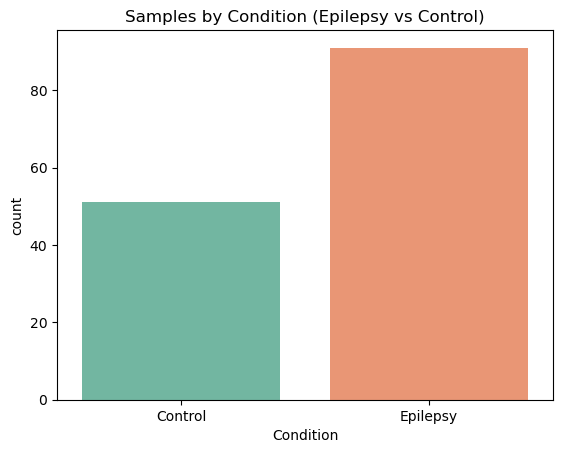

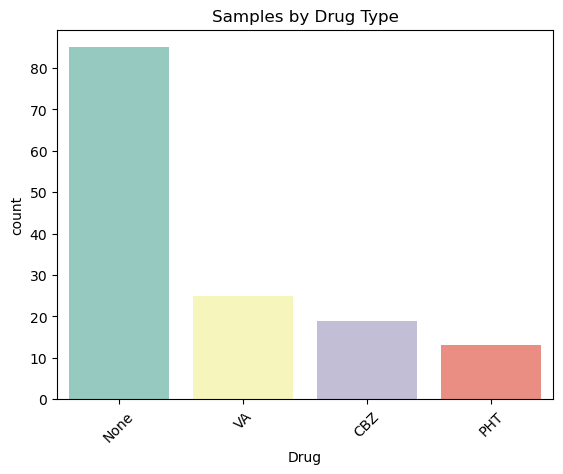

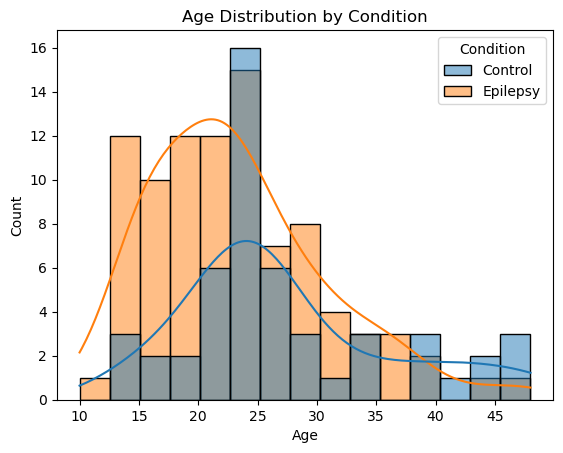

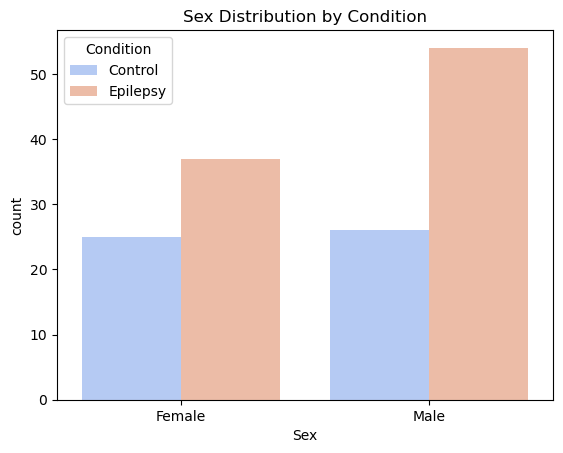

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic counts
print("Condition counts:\n", ml_df["Condition"].value_counts(), "\n")
print("Epilepsy type counts:\n", ml_df["Epilepsy Type"].value_counts(), "\n")
print("Drug counts:\n", ml_df["Drug"].value_counts(), "\n")
print("Drug response counts:\n", ml_df["Drug Response"].value_counts(), "\n")
print("Total male and female counts:\n", ml_df["Sex"].value_counts(), "\n")

# Plot sample counts by condition
sns.countplot(data=ml_df, x="Condition", hue="Condition",palette="Set2",legend=False)
plt.title("Samples by Condition (Epilepsy vs Control)")
plt.savefig("Epilepsy_vs_Control.png", dpi=300, bbox_inches="tight")
plt.show()

# Plot sample counts by drug
sns.countplot(data=ml_df, x="Drug",hue="Drug", palette="Set3",legend=False)
plt.title("Samples by Drug Type")
plt.xticks(rotation=45)
plt.savefig("Samples_by_Drug_Type.png", dpi=300, bbox_inches="tight")
plt.show()

# Plot age distribution
sns.histplot(data=ml_df, x="Age", hue="Condition", kde=True, bins=15)
plt.title("Age Distribution by Condition")
plt.savefig("Age_by_Condition.png", dpi=300, bbox_inches="tight")
plt.show()

# Plot sex distribution
sns.countplot(data=ml_df, x="Sex", hue="Condition", palette="coolwarm")
plt.title("Sex Distribution by Condition")
plt.savefig("Sex_Distribution_by_Condition.png", dpi=300, bbox_inches="tight")
plt.show()


In [85]:
ml_df["Age"].describe()

count    142.000000
mean      24.753521
std        8.203257
min       10.000000
25%       19.250000
50%       23.000000
75%       28.000000
max       48.000000
Name: Age, dtype: float64

### Gene Expression EDA(PCA on gene data)

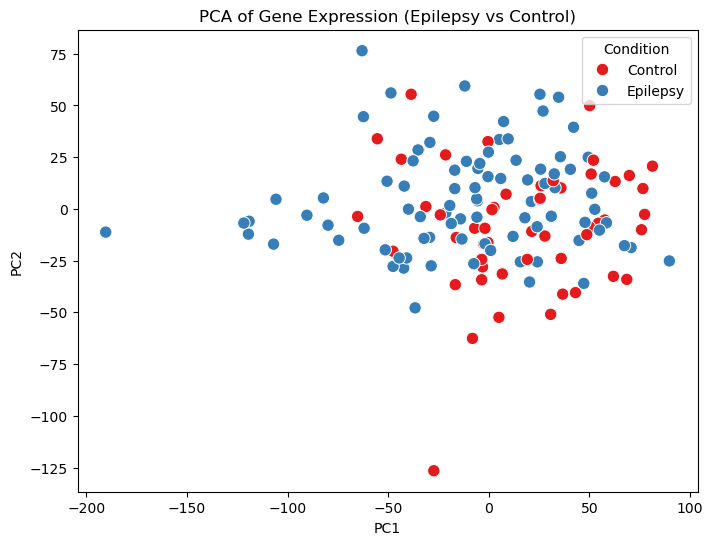

In [89]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract gene expression only (remove metadata columns)
gene_expr = ml_df.drop(columns=["SampleID","Title","Epilepsy Type","Treatment",
                                "Drug Response","Condition","Drug","Age","Sex"])

# Standardize
X_scaled = StandardScaler().fit_transform(gene_expr)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA back for plotting
pca_df = ml_df[["Condition"]].copy()
pca_df["PC1"] = X_pca[:,0]
pca_df["PC2"] = X_pca[:,1]

# Plot PCA
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Condition", palette="Set1", s=80)
plt.title("PCA of Gene Expression (Epilepsy vs Control)")

plt.savefig("pca_2d_plot.png", dpi=300, bbox_inches="tight")
plt.show()


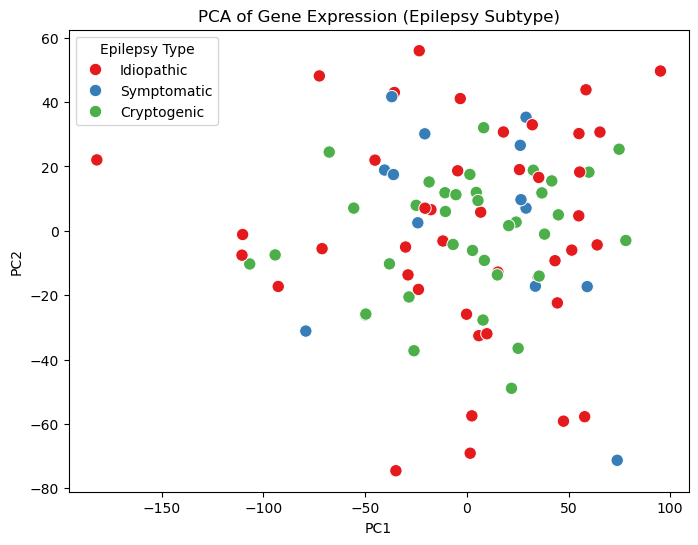

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Filter only epilepsy samples
df_epilepsy = ml_df[ml_df["Condition"] == "Epilepsy"].copy()

# Extract gene expression only (remove metadata columns)
gene_expr = df_epilepsy.drop(columns=["SampleID","Title","Epilepsy Type","Treatment",
                                "Drug Response","Condition","Drug","Age","Sex"])

# Standardize
X_scaled = StandardScaler().fit_transform(gene_expr)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA back for plotting
pca_df = df_epilepsy[["Epilepsy Type"]].copy()
pca_df["PC1"] = X_pca[:,0]
pca_df["PC2"] = X_pca[:,1]

# Plot PCA
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2",hue="Epilepsy Type", palette="Set1", s=80)
plt.title("PCA of Gene Expression (Epilepsy Subtype)")

#plt.savefig("pca_2d_plot_subtype.png", dpi=300, bbox_inches="tight")
plt.show()

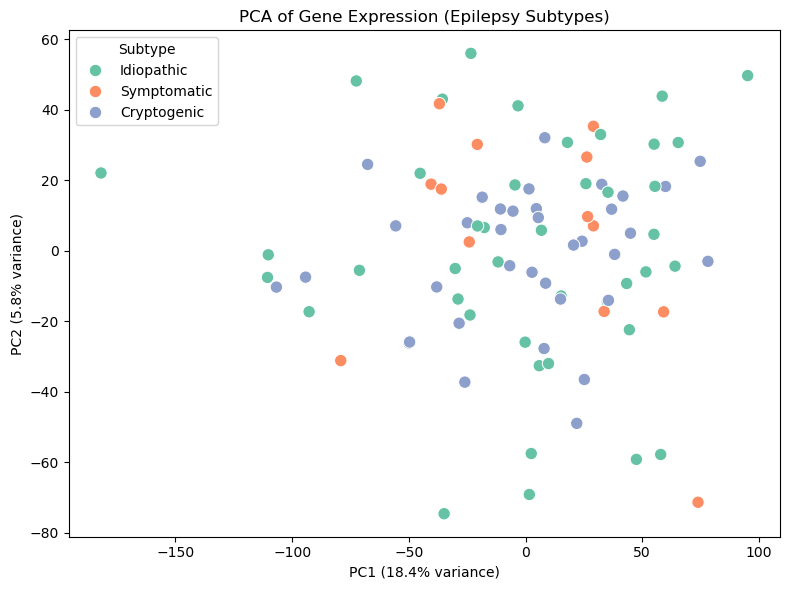

In [93]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only epilepsy samples
df_epilepsy = ml_df[ml_df["Condition"] == "Epilepsy"].copy()

# Extract gene expression only (drop metadata)
gene_expr = df_epilepsy.drop(columns=["SampleID","Title","Epilepsy Type","Treatment",
                                      "Drug Response","Condition","Drug","Age","Sex"])

# Standardize
X_scaled = StandardScaler().fit_transform(gene_expr)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
pca_df = df_epilepsy[["Epilepsy Type"]].copy()
pca_df["PC1"] = X_pca[:,0]
pca_df["PC2"] = X_pca[:,1]

# Plot PCA
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Epilepsy Type", palette="Set2", s=80)
plt.title("PCA of Gene Expression (Epilepsy Subtypes)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(title="Subtype")
plt.tight_layout()
plt.savefig("pca_epilepsy_subtype.png", dpi=300, bbox_inches="tight")
plt.show()


In [41]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 11.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1


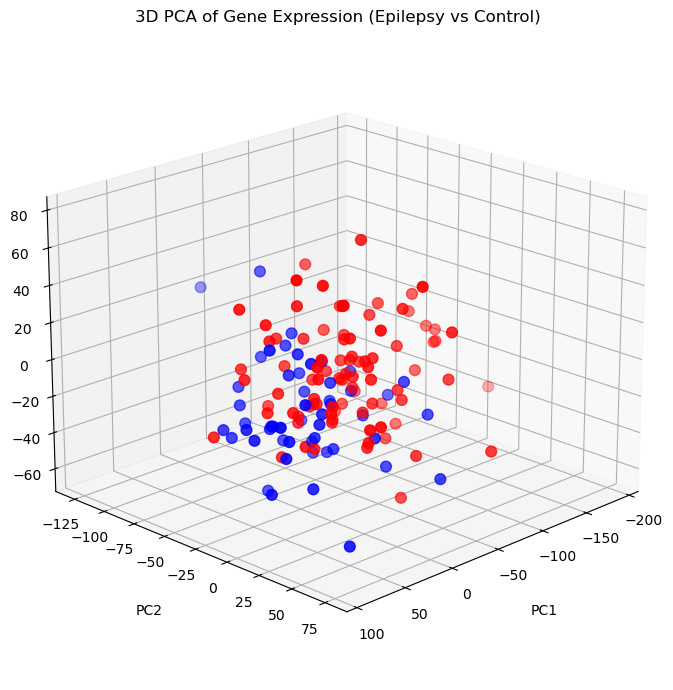

In [95]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Extract gene expression only
gene_expr = ml_df.drop(columns=["SampleID","Title","Epilepsy Type","Treatment",
                                "Drug Response","Condition","Drug","Age","Sex"])

# Standardize
X_scaled = StandardScaler().fit_transform(gene_expr)

# PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to dataframe
pca_df = ml_df[["Condition"]].copy()
pca_df["PC1"] = X_pca[:,0]
pca_df["PC2"] = X_pca[:,1]
pca_df["PC3"] = X_pca[:,2]

# 3D Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=45)  # change angles to rotate plot


scatter = ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"],
                     c=pca_df["Condition"].map({"Control": "blue", "Epilepsy": "red"}),
                     s=60)

ax.set_xlabel("PC1",labelpad=15)
ax.set_ylabel("PC2",labelpad=15)
ax.set_zlabel("PC3",labelpad=15)
ax.set_title("3D PCA of Gene Expression (Epilepsy vs Control)")

plt.savefig("pca_3d_plot.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()


### heatmap of top variable genes

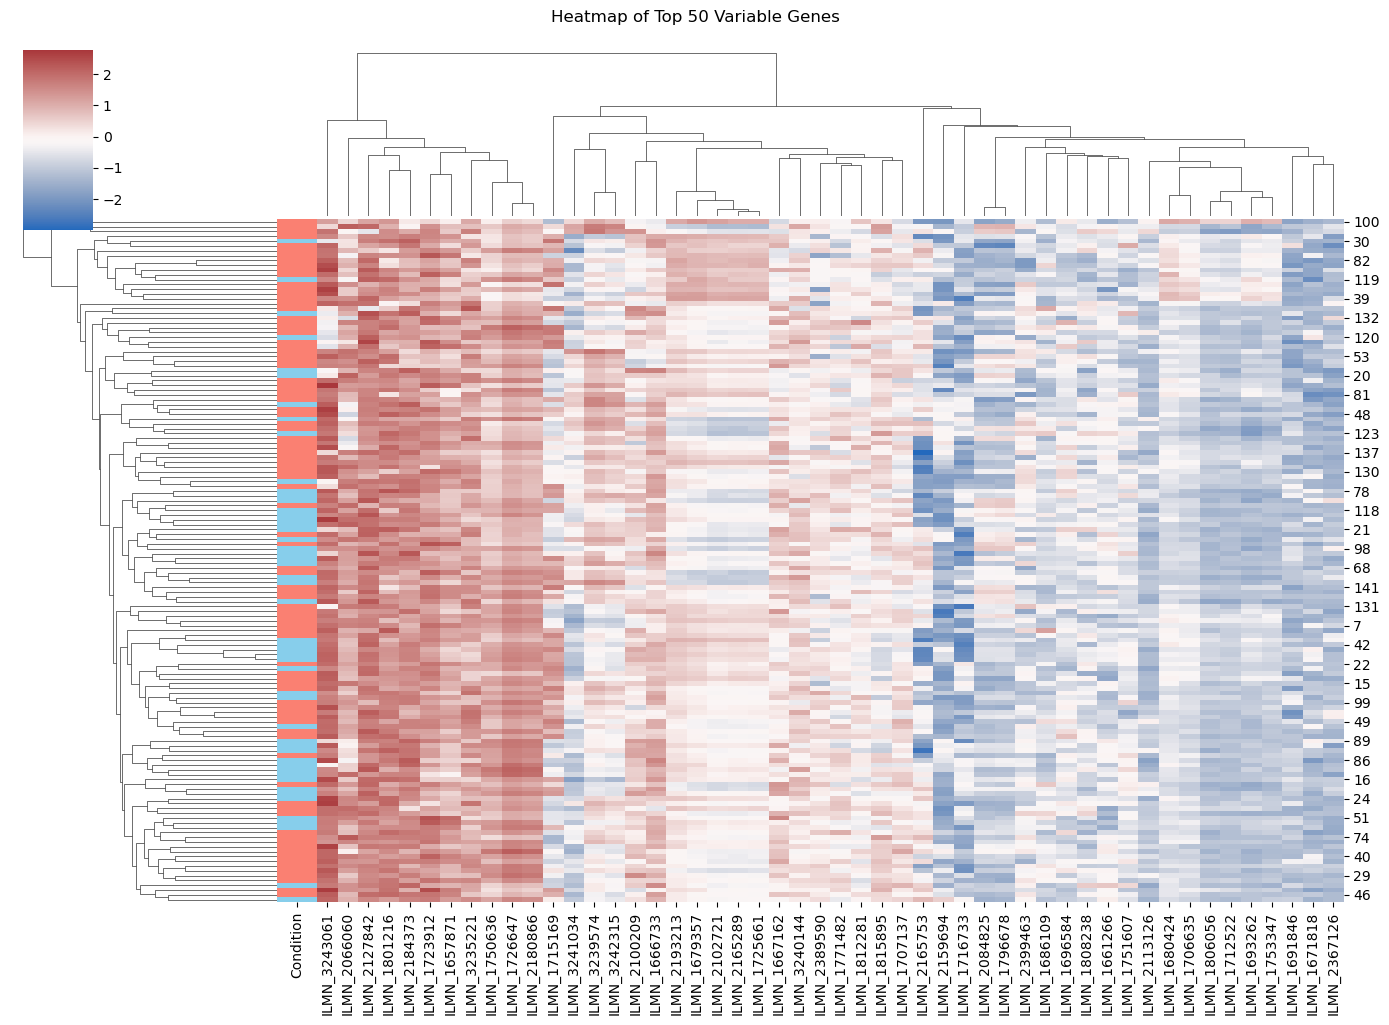

In [97]:
import numpy as np

# Extract gene expression only
gene_expr = ml_df.drop(columns=["SampleID","Title","Epilepsy Type","Treatment",
                                "Drug Response","Condition","Drug","Age","Sex"])

# Calculate variance for each gene
gene_variances = gene_expr.var().sort_values(ascending=False)

# Pick top 50 most variable genes
top_genes = gene_variances.head(50).index
top_expr = gene_expr[top_genes]

# Add condition for row annotation 
heatmap_data = top_expr.copy()
heatmap_data["Condition"] = ml_df["Condition"].values

# Create row colors based on Condition
row_colors = heatmap_data["Condition"].map({"Control":"skyblue", "Epilepsy":"salmon"})

# Drop Condition before plotting
heatmap_data = heatmap_data.drop(columns=["Condition"])

# Plot heatmap
sns.clustermap(
    heatmap_data,
    cmap="vlag",
    row_colors=row_colors,
    col_cluster=True,
    z_score=0,  # normalize genes
    figsize=(14,10)
)

plt.suptitle("Heatmap of Top 50 Variable Genes", y=1.02)
plt.savefig("heatmap_top50_genes.png", dpi=300, bbox_inches="tight")
plt.show()


### comaparing different feature selection

In [105]:
!pip install scikit-learn==1.5.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 10.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.1 which is incompatible.


In [107]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Identify expression columns (they all start with "ILMN_")
expr_cols = [col for col in ml_df.columns if col.startswith("ILMN_")]

# Step 1: Features & target
X = ml_df[expr_cols]   # expression data
y = ml_df["Condition"].map({"Control":0, "Epilepsy":1})

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Method 1: Variance Threshold ---
var_thresh = VarianceThreshold(threshold=0.01)  # remove low-variance genes
X_var = var_thresh.fit_transform(X_scaled)
print("After Variance Threshold:", X_var.shape)

# --- Method 2: SelectKBest (ANOVA F-test) ---
k = 500  # choose top 500 genes
selector = SelectKBest(score_func=f_classif, k=k)
X_kbest = selector.fit_transform(X_scaled, y)
selected_genes = [expr_cols[i] for i in selector.get_support(indices=True)]
print("After SelectKBest:", X_kbest.shape)
print("Top 10 genes:", selected_genes[:10])

# --- Method 3: PCA ---
pca = PCA(n_components=50)  # keep top 50 components
X_pca = pca.fit_transform(X_scaled)
print("After PCA:", X_pca.shape)


After Variance Threshold: (142, 13165)
After SelectKBest: (142, 500)
Top 10 genes: ['ILMN_1651316', 'ILMN_1651628', 'ILMN_1651767', 'ILMN_1652085', 'ILMN_1652407', 'ILMN_1652736', 'ILMN_1652754', 'ILMN_1652906', 'ILMN_1652928', 'ILMN_1653466']
After PCA: (142, 50)


In [113]:
from sklearn.feature_selection import VarianceThreshold

# Apply variance threshold
var_thresh = VarianceThreshold(threshold=0.0)  # keep only features with non-zero variance
X_var = var_thresh.fit_transform(X)

# Check kept vs dropped features
kept_genes = X.columns[var_thresh.get_support()]
dropped_genes = X.columns[~var_thresh.get_support()]

print(f"Original number of genes: {X.shape[1]}")
print(f"Number of genes kept: {X_var.shape[1]}")
print(f"Number of genes dropped: {len(dropped_genes)}")

# If you want to see which specific genes were dropped:
print("Dropped genes:", dropped_genes.tolist())


Original number of genes: 13165
Number of genes kept: 13165
Number of genes dropped: 0
Dropped genes: []


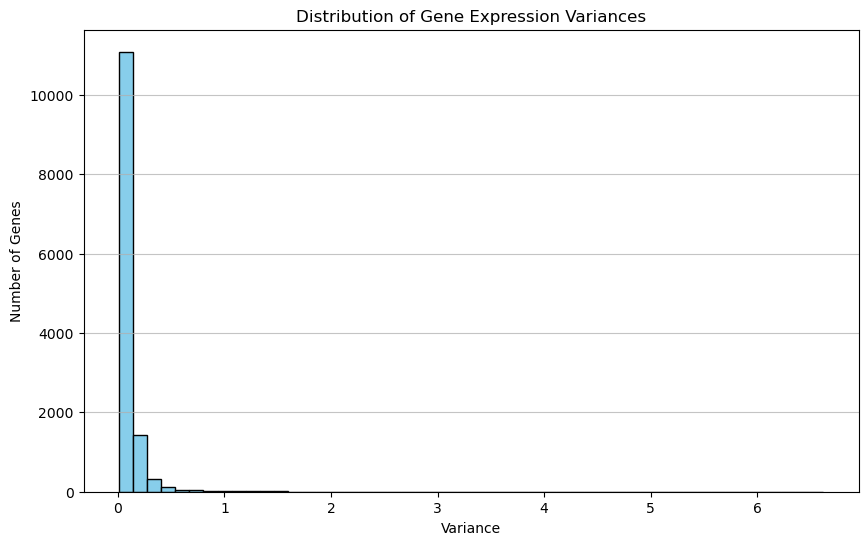

Minimum variance: 0.009741555322625453
Median variance: 0.07135882542638117
Maximum variance: 6.621534301201627


In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate variance for each gene
variances = X.var(axis=0)

# Plot histogram of variances
plt.figure(figsize=(10,6))
plt.hist(variances, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Gene Expression Variances")
plt.xlabel("Variance")
plt.ylabel("Number of Genes")
plt.grid(axis='y', alpha=0.75)
plt.show()

# Optional: Show some stats
print("Minimum variance:", variances.min())
print("Median variance:", np.median(variances))
print("Maximum variance:", variances.max())


### machine learning model with pipeline

Model1 (Condition) class distribution:
  0: 51
  1: 91

--- Epilepsy vs Control | LR (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.79      0.98      0.88        51
           1       0.99      0.86      0.92        91

    accuracy                           0.90       142
   macro avg       0.89      0.92      0.90       142
weighted avg       0.92      0.90      0.90       142



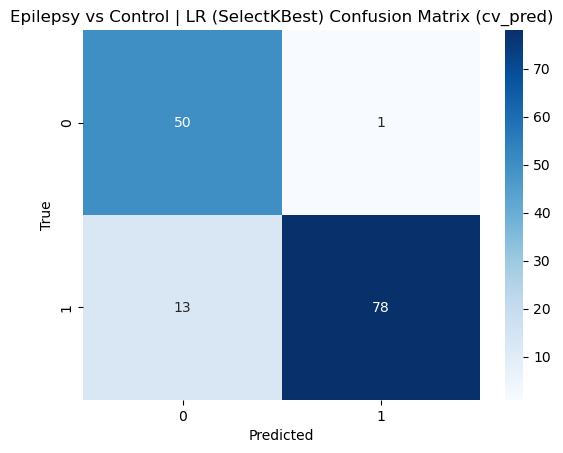


--- Epilepsy vs Control | RF (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.84      0.61      0.70        51
           1       0.81      0.93      0.87        91

    accuracy                           0.82       142
   macro avg       0.82      0.77      0.79       142
weighted avg       0.82      0.82      0.81       142



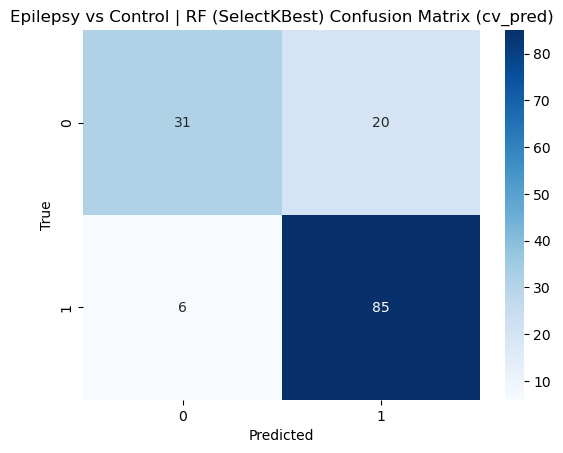


--- Epilepsy vs Control | SVC (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        51
           1       0.92      0.90      0.91        91

    accuracy                           0.89       142
   macro avg       0.88      0.88      0.88       142
weighted avg       0.89      0.89      0.89       142



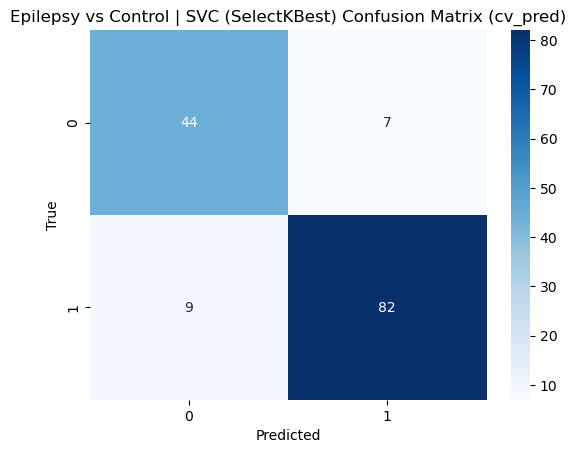

Model2 (Epilepsy Type) class distribution:
  0: 36
  1: 42
  2: 13

--- Subtype | LR (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.52      0.67      0.59        36
           1       0.76      0.62      0.68        42
           2       0.45      0.38      0.42        13

    accuracy                           0.60        91
   macro avg       0.58      0.56      0.56        91
weighted avg       0.62      0.60      0.61        91



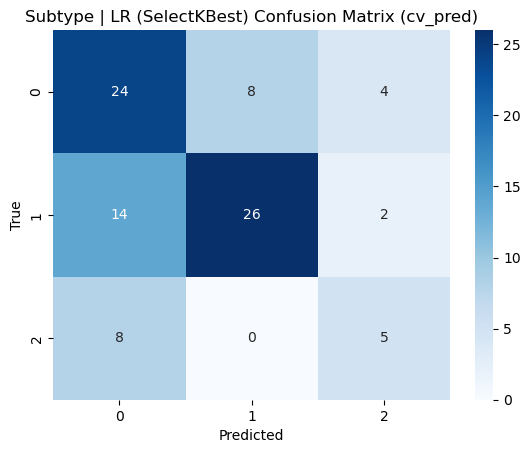


--- Subtype | RF (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        36
           1       0.60      0.79      0.68        42
           2       0.00      0.00      0.00        13

    accuracy                           0.59        91
   macro avg       0.39      0.46      0.42        91
weighted avg       0.51      0.59      0.54        91



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


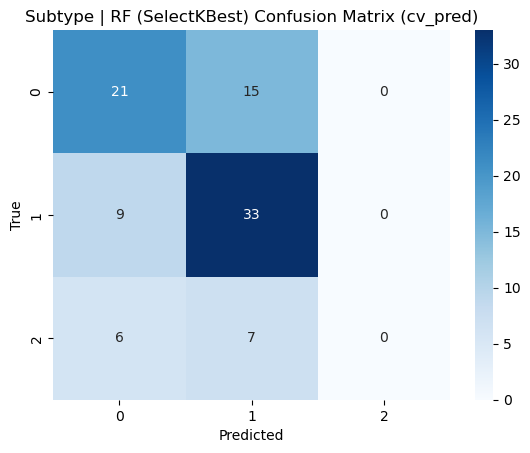

Model3 (Drug Response) class distribution:
  0: 24
  1: 33

--- DrugResponse | LR (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.60      0.62      0.61        24
           1       0.72      0.70      0.71        33

    accuracy                           0.67        57
   macro avg       0.66      0.66      0.66        57
weighted avg       0.67      0.67      0.67        57



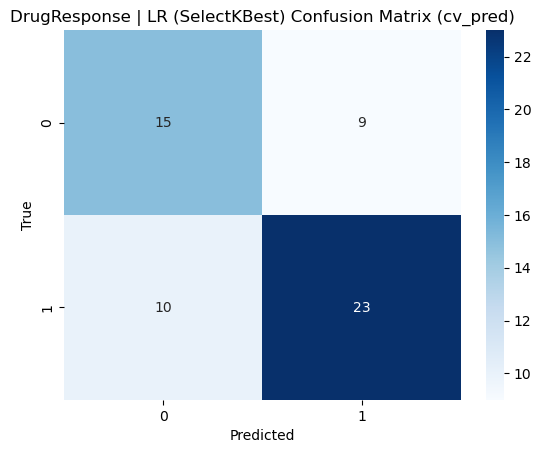


--- DrugResponse | RF (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.59      0.42      0.49        24
           1       0.65      0.79      0.71        33

    accuracy                           0.63        57
   macro avg       0.62      0.60      0.60        57
weighted avg       0.62      0.63      0.62        57



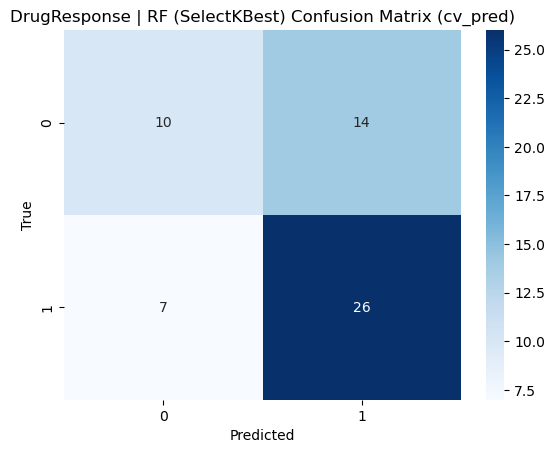

Best params (RF grid): {'clf__max_depth': None, 'clf__n_estimators': 100, 'select__k': 100}
Best CV score: 0.8378175091023387


In [117]:
# ML pipeline (robust) — uses ml_df explicitly
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ------------ helper utilities ------------
def get_expr_cols(df):
    return [c for c in df.columns if str(c).startswith("ILMN_")]

def print_class_info(y, title=""):
    unique, counts = np.unique(y, return_counts=True)
    print(f"{title} class distribution:")
    for u, c in zip(unique, counts):
        print(f"  {u}: {c}")
    return dict(zip(unique, counts))

def choose_cv_splits(y, max_splits=5):
    """Choose number of CV splits based on minimum class count (stratified)."""
    _, counts = np.unique(y, return_counts=True)
    min_count = counts.min()
    # at least 2 splits required
    n_splits = min(max_splits, min_count) if min_count >= 2 else 2
    n_splits = max(2, n_splits)
    return n_splits

# ------------ prepare target & features function ------------
def prepare_X_y(df, target_col, use_only_labelled=True):
    """
    df: ml_df
    target_col: 'Condition' / 'Epilepsy Type' / 'Drug Response'
    use_only_labelled: if True, drop rows where target is NaN
    returns: X (dataframe), y (encoded labels), le (LabelEncoder), expr_cols
    """
    expr_cols = get_expr_cols(df)
    sub = df.copy()
    if use_only_labelled:
        sub = sub[sub[target_col].notna()].copy()
    X = sub[expr_cols].copy()
    y_raw = sub[target_col].astype(str).copy()
    # If some labels are the string "nan" from casting, convert to np.nan and drop if requested:
    y_raw = y_raw.replace({'nan': np.nan})
    if use_only_labelled:
        # after replacement, drop NA rows
        mask_notna = y_raw.notna()
        X = X.loc[mask_notna]
        y_raw = y_raw.loc[mask_notna]
    # Encode y
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    return X, y, le, expr_cols

# ------------ evaluation function using pipeline and cross-val predict ------------
def run_evaluation_pipeline(X_df, y, pipeline, model_name="Model", cv_splits=5):
    """
    X_df: DataFrame of features (genes)
    pipeline: sklearn Pipeline that ends with a classifier
    cv_splits: int
    """
    X = X_df.values  # pipeline expects array
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    # cross_val_predict to get predictions on held-out folds
    y_pred = cross_val_predict(pipeline, X, y, cv=skf, method='predict', n_jobs=-1)
    print(f"\n--- {model_name} (CV={cv_splits}) ---")
    print(classification_report(y, y_pred))
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix (cv_pred)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.savefig(f"{model_name} Confusion Matrix (cv_pred)", dpi=300, bbox_inches="tight")
    plt.show()
    return y_pred

# ------------ base model definitions via pipeline ------------
def build_pipeline_selectk_clf(clf, k_features=500):
    """
    Pipeline: scaler -> selectkbest -> classifier
    """
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=min(k_features, 5000))), # safe cap
        ('clf', clf)
    ])
    return pipe

def build_pipeline_pca_clf(clf, k_features=500, n_pca=50):
    """
    Pipeline: scaler -> selectkbest -> PCA -> classifier
    """
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=min(k_features, 5000))),
        ('pca', PCA(n_components=n_pca)),
        ('clf', clf)
    ])
    return pipe

# ------------ Example run for Model 1: Epilepsy vs Control ------------
# Prepare data (use only labelled - in this case Condition is filled for all rows)
X1, y1, le1, expr_cols = prepare_X_y(ml_df, target_col="Condition", use_only_labelled=True)
print_class_info(y1, "Model1 (Condition)")
cv1 = choose_cv_splits(y1, max_splits=5)

# Pipelines (SelectKBest and PCA-variant)
lr = LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear', random_state=42)
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
sv = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)

pipe_lr_sk = build_pipeline_selectk_clf(lr, k_features=500)
pipe_rf_sk = build_pipeline_selectk_clf(rf, k_features=500)
pipe_svc_sk = build_pipeline_selectk_clf(sv, k_features=500)

# Run CV evaluations (these are cross-validated predictions)
pred_lr = run_evaluation_pipeline(X1, y1, pipe_lr_sk, model_name="Epilepsy vs Control | LR (SelectKBest)", cv_splits=cv1)
pred_rf = run_evaluation_pipeline(X1, y1, pipe_rf_sk, model_name="Epilepsy vs Control | RF (SelectKBest)", cv_splits=cv1)
pred_svc = run_evaluation_pipeline(X1, y1, pipe_svc_sk, model_name="Epilepsy vs Control | SVC (SelectKBest)", cv_splits=cv1)

# ------------ Example run for Model 2: Subtype classification (only Epilepsy rows) ------------
df_epilepsy = ml_df[ml_df["Condition"] == "Epilepsy"].copy()
X2, y2, le2, expr_cols = prepare_X_y(df_epilepsy, target_col="Epilepsy Type", use_only_labelled=True)
print_class_info(y2, "Model2 (Epilepsy Type)")
cv2 = choose_cv_splits(y2, max_splits=5)  # may be smaller if classes imbalanced

pipe_lr_sk2 = build_pipeline_selectk_clf(LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear', random_state=42), k_features=500)
pipe_rf_sk2 = build_pipeline_selectk_clf(RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42), k_features=500)

pred_lr2 = run_evaluation_pipeline(X2, y2, pipe_lr_sk2, model_name="Subtype | LR (SelectKBest)", cv_splits=cv2)
pred_rf2 = run_evaluation_pipeline(X2, y2, pipe_rf_sk2, model_name="Subtype | RF (SelectKBest)", cv_splits=cv2)

# ------------ Example run for Model 3: Drug response (Responder vs Non-responder) ------------
df_dr = ml_df[ml_df["Drug Response"].notna()].copy()
X3, y3, le3, expr_cols = prepare_X_y(df_dr, target_col="Drug Response", use_only_labelled=True)
print_class_info(y3, "Model3 (Drug Response)")
cv3 = choose_cv_splits(y3, max_splits=5)

pipe_lr_sk3 = build_pipeline_selectk_clf(LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear', random_state=42), k_features=300)
pipe_rf_sk3 = build_pipeline_selectk_clf(RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42), k_features=300)

pred_lr3 = run_evaluation_pipeline(X3, y3, pipe_lr_sk3, model_name="DrugResponse | LR (SelectKBest)", cv_splits=cv3)
pred_rf3 = run_evaluation_pipeline(X3, y3, pipe_rf_sk3, model_name="DrugResponse | RF (SelectKBest)", cv_splits=cv3)

# ------------ Hyperparameter tuning example (GridSearchCV for RandomForest on Model1) ------------
# Note: this runs on whole X1,y1 and uses internal CV (be mindful of time)
param_grid = {
    'select__k': [100, 300, 500],              # number of top genes to keep
    'clf__n_estimators': [100, 200],           # RF trees
    'clf__max_depth': [None, 10, 30]
}
grid_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif)),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])
cv_for_grid = StratifiedKFold(n_splits=min(5, choose_cv_splits(y1, 5)), shuffle=True, random_state=42)
grid = GridSearchCV(grid_pipe, param_grid=param_grid, cv=cv_for_grid, scoring='f1_macro', n_jobs=-1)
grid.fit(X1.values, y1)
print("Best params (RF grid):", grid.best_params_)
print("Best CV score:", grid.best_score_)


Model1 (Condition) class distribution:
  0: 51
  1: 91

--- Epilepsy vs Control | LR (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.79      0.98      0.88        51
           1       0.99      0.86      0.92        91

    accuracy                           0.90       142
   macro avg       0.89      0.92      0.90       142
weighted avg       0.92      0.90      0.90       142



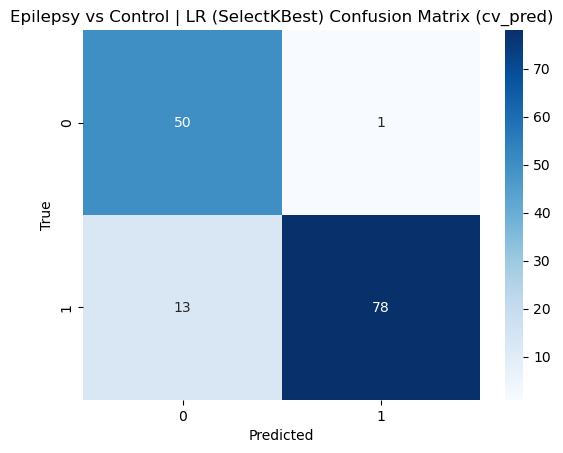


--- Epilepsy vs Control | RF (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.84      0.61      0.70        51
           1       0.81      0.93      0.87        91

    accuracy                           0.82       142
   macro avg       0.82      0.77      0.79       142
weighted avg       0.82      0.82      0.81       142



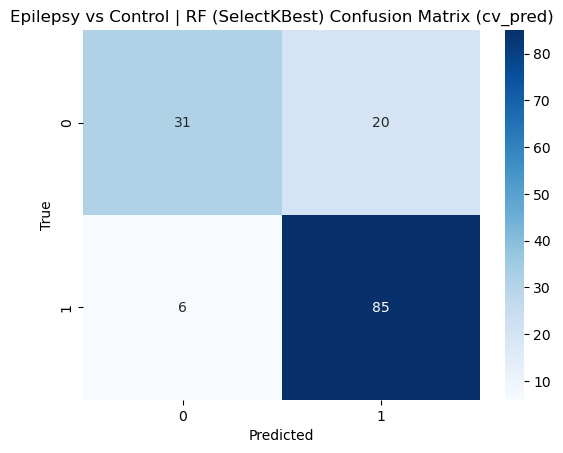


--- Epilepsy vs Control | SVC (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        51
           1       0.92      0.90      0.91        91

    accuracy                           0.89       142
   macro avg       0.88      0.88      0.88       142
weighted avg       0.89      0.89      0.89       142



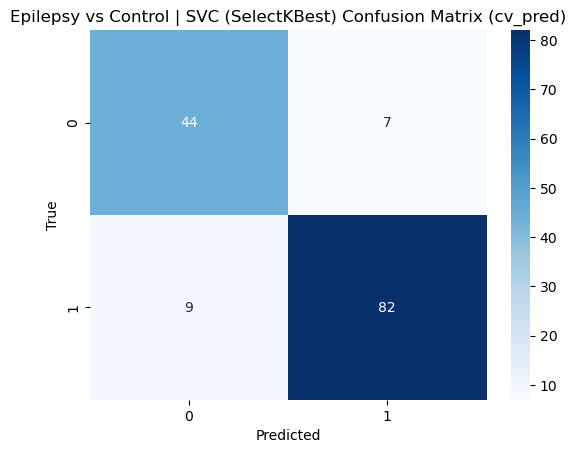

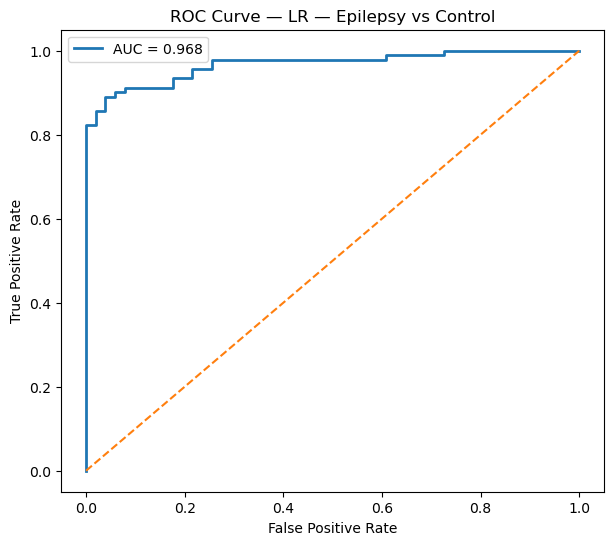

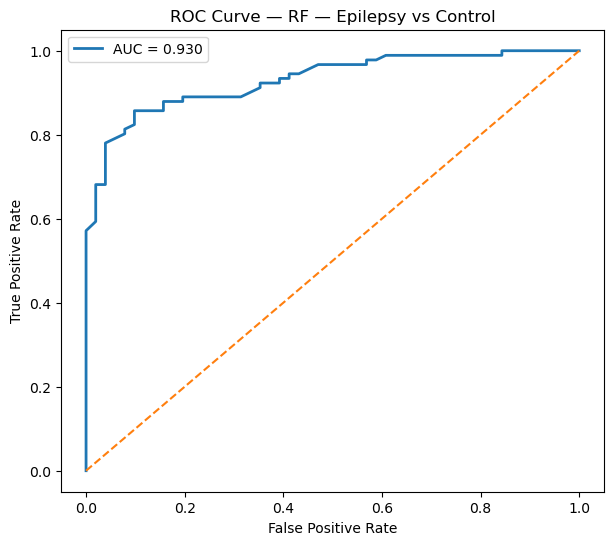

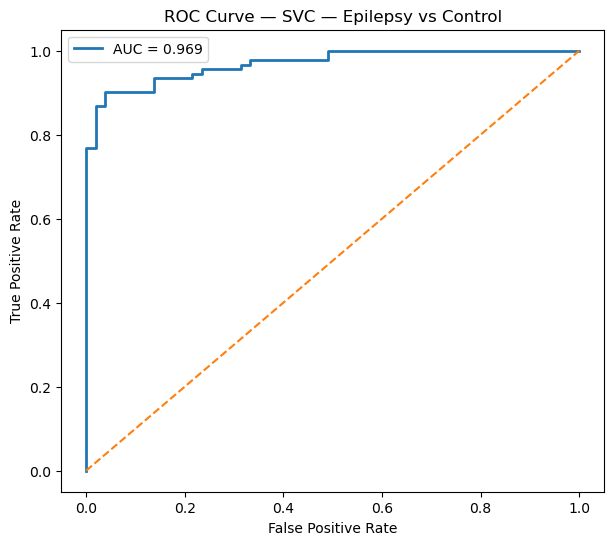

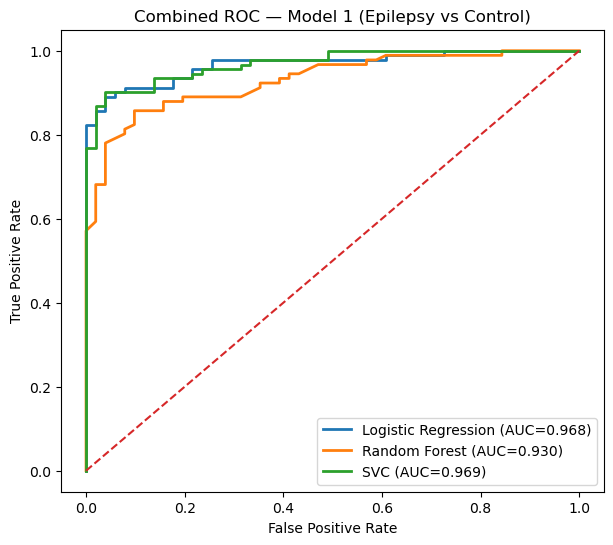

Model2 (Epilepsy Type) class distribution:
  0: 36
  1: 42
  2: 13

--- Subtype | LR (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.52      0.67      0.59        36
           1       0.76      0.62      0.68        42
           2       0.45      0.38      0.42        13

    accuracy                           0.60        91
   macro avg       0.58      0.56      0.56        91
weighted avg       0.62      0.60      0.61        91



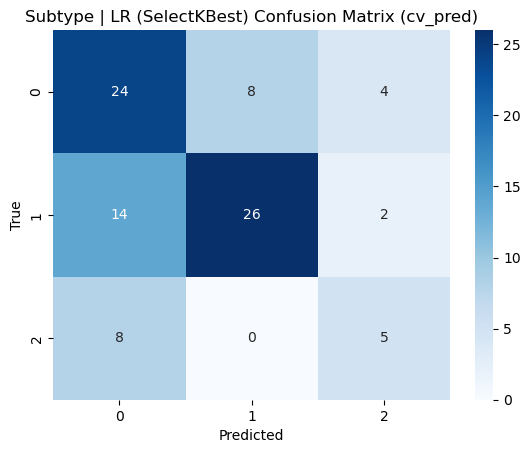


--- Subtype | RF (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        36
           1       0.60      0.79      0.68        42
           2       0.00      0.00      0.00        13

    accuracy                           0.59        91
   macro avg       0.39      0.46      0.42        91
weighted avg       0.51      0.59      0.54        91



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


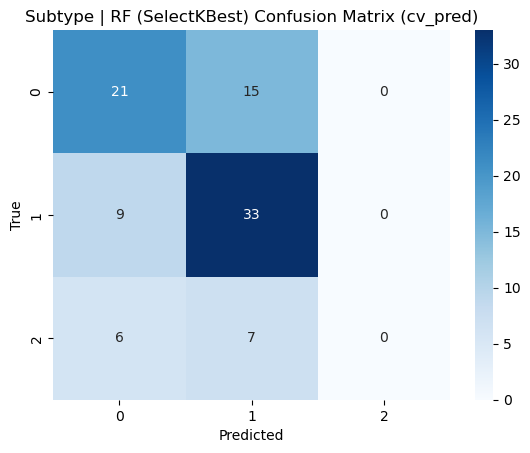

ValueError: multiclass format is not supported

In [178]:
# ML pipeline (robust) — uses ml_df explicitly
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns

# ------------ helper utilities ------------
def get_expr_cols(df):
    return [c for c in df.columns if str(c).startswith("ILMN_")]

def print_class_info(y, title=""):
    unique, counts = np.unique(y, return_counts=True)
    print(f"{title} class distribution:")
    for u, c in zip(unique, counts):
        print(f"  {u}: {c}")
    return dict(zip(unique, counts))

def choose_cv_splits(y, max_splits=5):
    """Choose number of CV splits based on minimum class count (stratified)."""
    _, counts = np.unique(y, return_counts=True)
    min_count = counts.min()
    # at least 2 splits required
    n_splits = min(max_splits, min_count) if min_count >= 2 else 2
    n_splits = max(2, n_splits)
    return n_splits

# ------------ prepare target & features function ------------
def prepare_X_y(df, target_col, use_only_labelled=True):
    """
    df: ml_df
    target_col: 'Condition' / 'Epilepsy Type' / 'Drug Response'
    use_only_labelled: if True, drop rows where target is NaN
    returns: X (dataframe), y (encoded labels), le (LabelEncoder), expr_cols
    """
    expr_cols = get_expr_cols(df)
    sub = df.copy()
    if use_only_labelled:
        sub = sub[sub[target_col].notna()].copy()
    X = sub[expr_cols].copy()
    y_raw = sub[target_col].astype(str).copy()
    # If some labels are the string "nan" from casting, convert to np.nan and drop if requested:
    y_raw = y_raw.replace({'nan': np.nan})
    if use_only_labelled:
        # after replacement, drop NA rows
        mask_notna = y_raw.notna()
        X = X.loc[mask_notna]
        y_raw = y_raw.loc[mask_notna]
    # Encode y
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    return X, y, le, expr_cols

# ------------ evaluation function using pipeline and cross-val predict ------------
def run_evaluation_pipeline(X_df, y, pipeline, model_name="Model", cv_splits=5):
    """
    X_df: DataFrame of features (genes)
    pipeline: sklearn Pipeline that ends with a classifier
    cv_splits: int
    """
    X = X_df.values  # pipeline expects array
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    # cross_val_predict to get predictions on held-out folds
    y_pred = cross_val_predict(pipeline, X, y, cv=skf, method='predict', n_jobs=-1)
    print(f"\n--- {model_name} (CV={cv_splits}) ---")
    print(classification_report(y, y_pred))
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix (cv_pred)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.savefig(f"{model_name} Confusion Matrix (cv_pred)", dpi=300, bbox_inches="tight")
    plt.show()
    return y_pred

# ------------ base model definitions via pipeline ------------
def build_pipeline_selectk_clf(clf, k_features=500):
    """
    Pipeline: scaler -> selectkbest -> classifier
    """
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=min(k_features, 5000))), # safe cap
        ('clf', clf)
    ])
    return pipe

def build_pipeline_pca_clf(clf, k_features=500, n_pca=50):
    """
    Pipeline: scaler -> selectkbest -> PCA -> classifier
    """
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=min(k_features, 5000))),
        ('pca', PCA(n_components=n_pca)),
        ('clf', clf)
    ])
    return pipe



# ---------------- ROC_Curve --------------------------------------
def cv_roc_curve(model_pipeline, X, y, model_name, save_name, cv_splits=5):
    """
    Generates ROC curve using cross_val_predict probabilities.
    Returns FPR, TPR, AUC.
    """
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    # Get CV probability predictions
    y_prob = cross_val_predict(
        model_pipeline,
        X.values,
        y,
        cv=skf,
        method='predict_proba',
        n_jobs=-1
    )[:, 1]

    # ROC calculations
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve — {model_name}")
    plt.legend()
    plt.savefig(save_name, dpi=300, bbox_inches="tight")
    plt.show()

    return fpr, tpr, roc_auc

# ------------------ combined roc for all model------------------------
def combined_roc_plot(roc_results, title, save_name):
    """
    roc_results = list of tuples: (fpr, tpr, auc, label)
    """
    plt.figure(figsize=(7, 6))

    for fpr, tpr, auc_score, label in roc_results:
        plt.plot(fpr, tpr, lw=2, label=f"{label} (AUC={auc_score:.3f})")

    plt.plot([0,1], [0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.savefig(save_name, dpi=300, bbox_inches="tight")
    plt.show()



# ------------ Example run for Model 1: Epilepsy vs Control ------------
# Prepare data (use only labelled - in this case Condition is filled for all rows)
X1, y1, le1, expr_cols = prepare_X_y(ml_df, target_col="Condition", use_only_labelled=True)
print_class_info(y1, "Model1 (Condition)")
cv1 = choose_cv_splits(y1, max_splits=5)

# Pipelines (SelectKBest and PCA-variant)
lr = LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear', random_state=42)
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
sv = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)

pipe_lr_sk = build_pipeline_selectk_clf(lr, k_features=500)
pipe_rf_sk = build_pipeline_selectk_clf(rf, k_features=500)
pipe_svc_sk = build_pipeline_selectk_clf(sv, k_features=500)

# Run CV evaluations (these are cross-validated predictions)
pred_lr = run_evaluation_pipeline(X1, y1, pipe_lr_sk, model_name="Epilepsy vs Control | LR (SelectKBest)", cv_splits=cv1)
pred_rf = run_evaluation_pipeline(X1, y1, pipe_rf_sk, model_name="Epilepsy vs Control | RF (SelectKBest)", cv_splits=cv1)
pred_svc = run_evaluation_pipeline(X1, y1, pipe_svc_sk, model_name="Epilepsy vs Control | SVC (SelectKBest)", cv_splits=cv1)

# roc for different algorithm
roc_lr = cv_roc_curve(pipe_lr_sk, X1, y1,
                      model_name="LR — Epilepsy vs Control",
                      save_name="ROC_LR_Model1.png",
                      cv_splits=cv1)

roc_rf = cv_roc_curve(pipe_rf_sk, X1, y1,
                      model_name="RF — Epilepsy vs Control",
                      save_name="ROC_RF_Model1.png",
                      cv_splits=cv1)

roc_svc = cv_roc_curve(pipe_svc_sk, X1, y1,
                       model_name="SVC — Epilepsy vs Control",
                       save_name="ROC_SVC_Model1.png",
                       cv_splits=cv1)

# roc for combined model1 
combined_roc_plot(
    roc_results=[
        (*roc_lr, "Logistic Regression"),
        (*roc_rf, "Random Forest"),
        (*roc_svc, "SVC")
    ],
    title="Combined ROC — Model 1 (Epilepsy vs Control)",
    save_name="ROC_Combined_Model1.png"
)



# ------------ Example run for Model 2: Subtype classification (only Epilepsy rows) ------------
df_epilepsy = ml_df[ml_df["Condition"] == "Epilepsy"].copy()
X2, y2, le2, expr_cols = prepare_X_y(df_epilepsy, target_col="Epilepsy Type", use_only_labelled=True)
print_class_info(y2, "Model2 (Epilepsy Type)")
cv2 = choose_cv_splits(y2, max_splits=5)  # may be smaller if classes imbalanced

pipe_lr_sk2 = build_pipeline_selectk_clf(LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear', random_state=42), k_features=500)
pipe_rf_sk2 = build_pipeline_selectk_clf(RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42), k_features=500)

pred_lr2 = run_evaluation_pipeline(X2, y2, pipe_lr_sk2, model_name="Subtype | LR (SelectKBest)", cv_splits=cv2)
pred_rf2 = run_evaluation_pipeline(X2, y2, pipe_rf_sk2, model_name="Subtype | RF (SelectKBest)", cv_splits=cv2)

roc_lr2 = cv_roc_curve(pipe_lr_sk2, X2, y2,
                       model_name="LR — Subtype",
                       save_name="ROC_LR_Model2.png",
                       cv_splits=cv2)

roc_rf2 = cv_roc_curve(pipe_rf_sk2, X2, y2,
                       model_name="RF — Subtype",
                       save_name="ROC_RF_Model2.png",
                       cv_splits=cv2)


combined_roc_plot(
    roc_results=[
        (*roc_lr2, "Logistic Regression"),
        (*roc_rf2, "Random Forest")
    ],
    title="Combined ROC — Model 2 (Epilepsy Subtype)",
    save_name="ROC_Combined_Model2.png"
)




# ------------ Example run for Model 3: Drug response (Responder vs Non-responder) ------------
df_dr = ml_df[ml_df["Drug Response"].notna()].copy()
X3, y3, le3, expr_cols = prepare_X_y(df_dr, target_col="Drug Response", use_only_labelled=True)
print_class_info(y3, "Model3 (Drug Response)")
cv3 = choose_cv_splits(y3, max_splits=5)

pipe_lr_sk3 = build_pipeline_selectk_clf(LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear', random_state=42), k_features=300)
pipe_rf_sk3 = build_pipeline_selectk_clf(RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42), k_features=300)

pred_lr3 = run_evaluation_pipeline(X3, y3, pipe_lr_sk3, model_name="DrugResponse | LR (SelectKBest)", cv_splits=cv3)
pred_rf3 = run_evaluation_pipeline(X3, y3, pipe_rf_sk3, model_name="DrugResponse | RF (SelectKBest)", cv_splits=cv3)


roc_lr3 = cv_roc_curve(pipe_lr_sk3, X3, y3,
                       model_name="LR — Drug Response",
                       save_name="ROC_LR_Model3.png",
                       cv_splits=cv3)

roc_rf3 = cv_roc_curve(pipe_rf_sk3, X3, y3,
                       model_name="RF — Drug Response",
                       save_name="ROC_RF_Model3.png",
                       cv_splits=cv3)

combined_roc_plot(
    roc_results=[
        (*roc_lr3, "Logistic Regression"),
        (*roc_rf3, "Random Forest")
    ],
    title="Combined ROC — Model 3 (Drug Response Prediction)",
    save_name="ROC_Combined_Model3.png"
)




# ------------ Hyperparameter tuning example (GridSearchCV for RandomForest on Model1) ------------
# Note: this runs on whole X1,y1 and uses internal CV (be mindful of time)
param_grid = {
    'select__k': [100, 300, 500],              # number of top genes to keep
    'clf__n_estimators': [100, 200],           # RF trees
    'clf__max_depth': [None, 10, 30]
}
grid_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif)),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])
cv_for_grid = StratifiedKFold(n_splits=min(5, choose_cv_splits(y1, 5)), shuffle=True, random_state=42)
grid = GridSearchCV(grid_pipe, param_grid=param_grid, cv=cv_for_grid, scoring='f1_macro', n_jobs=-1)
grid.fit(X1.values, y1)
print("Best params (RF grid):", grid.best_params_)
print("Best CV score:", grid.best_score_)


### Grid search evaluation

In [119]:
# Place this cell AFTER your initial CV evaluations (so you can compare)
# and AFTER you prepared X1,y1 (Model1), X2,y2 (Model2), X3,y3 (Model3)

import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Optional: if you want XGBoost (install xgboost then import)
try:
    from xgboost import XGBClassifier
    have_xgb = True
except Exception:
    have_xgb = False

def run_grid_for_model(X, y, model_name, outdir="saved_models", cv_splits=5, use_smote=False, light=True):
    """
    X: dataframe or 2D array of features (genes)
    y: label array
    model_name: string for filenames
    use_smote: if True, insert SMOTE in pipeline (requires imblearn)
    light: if True, use a smaller param grid (recommended on laptop)
    """
    import os
    os.makedirs(outdir, exist_ok=True)

    # common steps
    scaler = ('scaler', StandardScaler())
    selector = ('select', SelectKBest(score_func=f_classif))  # k will be tuned

    # prepare classifiers and grids
    estimators = {
        'rf': (RandomForestClassifier(class_weight='balanced', random_state=42), 
               {'clf__n_estimators': [100, 200] if not light else [100],
                'clf__max_depth': [None, 10] if not light else [None],
                'select__k': [100, 300, 500] if not light else [100, 300]}),
        'lr': (LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear', random_state=42),
               {'clf__C': [0.1, 1.0] if not light else [1.0],
                'select__k': [100, 300] if not light else [100]}),
        'svc': (SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42),
               {'clf__C': [0.1, 1.0] if not light else [1.0],
                'select__k': [100, 300] if not light else [100]}),
    }
    if have_xgb:
        estimators['xgb'] = (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                             {'clf__n_estimators': [50, 100] if not light else [50],
                              'clf__max_depth': [3, 6] if not light else [3],
                              'select__k': [100, 300] if not light else [100]})

    # if you want SMOTE inside the pipeline, import and add
    if use_smote:
        from imblearn.pipeline import Pipeline as ImbPipeline
        from imblearn.over_sampling import SMOTE
        pipeline_cls = ImbPipeline
        smote_step = ('smote', SMOTE(random_state=42))
    else:
        pipeline_cls = Pipeline
        smote_step = None

    results = {}
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    for name, (clf, grid_params) in estimators.items():
        steps = []
        steps.append(scaler)
        if smote_step:
            steps.append(smote_step)
        steps.append(selector)
        steps.append(('clf', clf))
        pipe = pipeline_cls(steps)

        grid = GridSearchCV(pipe, param_grid=grid_params, cv=skf, scoring='f1_macro', n_jobs=-1, verbose=1)
        print(f"\nRunning GridSearch for {model_name} - {name}")
        grid.fit(X, y)
        print(" Best params:", grid.best_params_)
        print(" Best CV score:", grid.best_score_)

        # save
        model_file = f"{outdir}/{model_name}__{name}__best_model.joblib"
        joblib.dump(grid.best_estimator_, model_file)
        print("Saved model to", model_file)

        results[name] = {'best_estimator': grid.best_estimator_, 'best_params': grid.best_params_, 'best_score': grid.best_score_, 'model_file': model_file}

    return results

# Example usage (light mode for laptop — set light=False if you have time/resources)
# For Model1:
res1 = run_grid_for_model(X1.values, y1, model_name="Model1_Condition", cv_splits=cv1, use_smote=False, light=True)

# For Model2 (may have small classes — choose cv carefully)
res2 = run_grid_for_model(X2.values, y2, model_name="Model2_Subtype", cv_splits=max(2, cv2), use_smote=True, light=True)

# For Model3:
res3 = run_grid_for_model(X3.values, y3, model_name="Model3_DrugResponse", cv_splits=max(2, cv3), use_smote=True, light=True)



Running GridSearch for Model1_Condition - rf
Fitting 5 folds for each of 2 candidates, totalling 10 fits
 Best params: {'clf__max_depth': None, 'clf__n_estimators': 100, 'select__k': 100}
 Best CV score: 0.8378175091023387
Saved model to saved_models/Model1_Condition__rf__best_model.joblib

Running GridSearch for Model1_Condition - lr
Fitting 5 folds for each of 1 candidates, totalling 5 fits
 Best params: {'clf__C': 1.0, 'select__k': 100}
 Best CV score: 0.8805853465141389
Saved model to saved_models/Model1_Condition__lr__best_model.joblib

Running GridSearch for Model1_Condition - svc
Fitting 5 folds for each of 1 candidates, totalling 5 fits
 Best params: {'clf__C': 1.0, 'select__k': 100}
 Best CV score: 0.8691219038587459
Saved model to saved_models/Model1_Condition__svc__best_model.joblib

Running GridSearch for Model1_Condition - xgb
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

 Best params: {'clf__max_depth': 3, 'clf__n_estimators': 50, 'select__k': 100}
 Best CV score: 0.7775031521161552
Saved model to saved_models/Model1_Condition__xgb__best_model.joblib

Running GridSearch for Model2_Subtype - rf
Fitting 5 folds for each of 2 candidates, totalling 10 fits
 Best params: {'clf__max_depth': None, 'clf__n_estimators': 100, 'select__k': 100}
 Best CV score: 0.4008882813093339
Saved model to saved_models/Model2_Subtype__rf__best_model.joblib

Running GridSearch for Model2_Subtype - lr
Fitting 5 folds for each of 1 candidates, totalling 5 fits
 Best params: {'clf__C': 1.0, 'select__k': 100}
 Best CV score: 0.5031261343961573
Saved model to saved_models/Model2_Subtype__lr__best_model.joblib

Running GridSearch for Model2_Subtype - svc
Fitting 5 folds for each of 1 candidates, totalling 5 fits
 Best params: {'clf__C': 1.0, 'select__k': 100}
 Best CV score: 0.43807252079967113
Saved model to saved_models/Model2_Subtype__svc__best_model.joblib

Running GridSearch fo

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

 Best params: {'clf__max_depth': 3, 'clf__n_estimators': 50, 'select__k': 100}
 Best CV score: 0.43881447528506357
Saved model to saved_models/Model2_Subtype__xgb__best_model.joblib

Running GridSearch for Model3_DrugResponse - rf
Fitting 5 folds for each of 2 candidates, totalling 10 fits
 Best params: {'clf__max_depth': None, 'clf__n_estimators': 100, 'select__k': 300}
 Best CV score: 0.6451098901098902
Saved model to saved_models/Model3_DrugResponse__rf__best_model.joblib

Running GridSearch for Model3_DrugResponse - lr
Fitting 5 folds for each of 1 candidates, totalling 5 fits
 Best params: {'clf__C': 1.0, 'select__k': 100}
 Best CV score: 0.5734831834831835
Saved model to saved_models/Model3_DrugResponse__lr__best_model.joblib

Running GridSearch for Model3_DrugResponse - svc
Fitting 5 folds for each of 1 candidates, totalling 5 fits
 Best params: {'clf__C': 1.0, 'select__k': 100}
 Best CV score: 0.6375668775668777
Saved model to saved_models/Model3_DrugResponse__svc__best_model.j

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Best params: {'clf__max_depth': 3, 'clf__n_estimators': 50, 'select__k': 100}
 Best CV score: 0.6562953712953712
Saved model to saved_models/Model3_DrugResponse__xgb__best_model.joblib


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:50:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [40]:
!pip install tensorflow


In [ ]:
# === GAN wrapper for Model1, Model2, Model3 ===
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential, optimizers
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# ========= CONFIGURABLE HYPERPARAMETERS =========
TOP_K = 300
NOISE_DIM = 100
EPOCHS = 1500     # reduce to speed up; can go to 3000 for thorough training
BATCH_SIZE = 16
LR = 2e-4
GEN_HIDDEN = [256, 256]
DISC_HIDDEN = [256, 256]
OUT_DIR = "gan_results"
os.makedirs(OUT_DIR, exist_ok=True)
# ===============================================

def build_generator(noise_dim, output_dim):
    model = Sequential()
    model.add(layers.Input(shape=(noise_dim,)))
    for h in GEN_HIDDEN:
        model.add(layers.Dense(h, activation='relu'))
        model.add(layers.BatchNormalization(momentum=0.8))
    model.add(layers.Dense(output_dim, activation='linear'))
    return model

def build_discriminator(input_dim):
    model = Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    for h in DISC_HIDDEN:
        model.add(layers.Dense(h, activation='relu'))
        model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def run_gan_for_model(model_name, X, y):
    print(f"\n===================== {model_name} =====================")
    model_dir = os.path.join(OUT_DIR, model_name.replace(" ", "_"))
    os.makedirs(model_dir, exist_ok=True)

    # Select top features (ANOVA)
    selector = SelectKBest(score_func=f_classif, k=min(TOP_K, X.shape[1]))
    selector.fit(X, y)
    X_sel = selector.transform(X)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_sel)

    input_dim = X_scaled.shape[1]
    generator = build_generator(NOISE_DIM, input_dim)
    discriminator = build_discriminator(input_dim)

    opt_d = optimizers.Adam(LR, beta_1=0.5)
    discriminator.compile(optimizer=opt_d, loss='binary_crossentropy', metrics=['accuracy'])
    discriminator.trainable = False
    z = layers.Input(shape=(NOISE_DIM,))
    fake = generator(z)
    valid = discriminator(fake)
    combined = Model(z, valid)
    opt_g = optimizers.Adam(LR, beta_1=0.5)
    combined.compile(optimizer=opt_g, loss='binary_crossentropy')

    d_losses, g_losses = [], []
    for epoch in range(1, EPOCHS + 1):
        # Train discriminator
        idx = np.random.randint(0, X_scaled.shape[0], BATCH_SIZE)
        real_batch = X_scaled[idx]
        noise = np.random.normal(0, 1, (BATCH_SIZE, NOISE_DIM))
        fake_batch = generator.predict(noise, verbose=0)
        d_loss_real = discriminator.train_on_batch(real_batch, np.ones((BATCH_SIZE, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_batch, np.zeros((BATCH_SIZE, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        # Train generator
        noise = np.random.normal(0, 1, (BATCH_SIZE, NOISE_DIM))
        g_loss = combined.train_on_batch(noise, np.ones((BATCH_SIZE, 1)))
        d_losses.append(d_loss[0])
        g_losses.append(g_loss)
        if epoch % 250 == 0 or epoch == 1:
            print(f"Epoch {epoch}/{EPOCHS} — d_loss: {d_loss[0]:.4f}, g_loss: {g_loss:.4f}")

    # Plot losses
    plt.figure(figsize=(6, 4))
    plt.plot(d_losses, label="Discriminator")
    plt.plot(g_losses, label="Generator")
    plt.title(f"GAN Losses ({model_name})")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(model_dir, "gan_losses.png"), dpi=200)
    plt.close()

    # Generate synthetic data
    n_samples = X_scaled.shape[0]
    noise = np.random.normal(0, 1, (n_samples, NOISE_DIM))
    synth_scaled = generator.predict(noise, verbose=0)
    synth = scaler.inverse_transform(synth_scaled)

    synth_df = pd.DataFrame(synth, columns=[f"feat_{i}" for i in range(synth.shape[1])])
    csv_path = os.path.join(model_dir, "synthetic_data.csv")
    synth_df.to_csv(csv_path, index=False)

    # PCA overlay visualization
    pca = PCA(n_components=2, random_state=SEED)
    real_2d = pca.fit_transform(scaler.inverse_transform(X_scaled))
    synth_2d = pca.transform(synth_df)
    plt.figure(figsize=(6, 5))
    plt.scatter(real_2d[:, 0], real_2d[:, 1], alpha=0.6, label="Real")
    plt.scatter(synth_2d[:, 0], synth_2d[:, 1], alpha=0.6, label="Synthetic")
    plt.legend()
    plt.title(f"PCA Overlay: Real vs Synthetic ({model_name})")
    plt.savefig(os.path.join(model_dir, "pca_overlay.png"), dpi=200)
    plt.close()

    print(f"✅ Saved synthetic data and plots for {model_name} to {model_dir}")

# ========= RUN FOR ALL THREE MODELS =========
model_data = {
    "Model1_Epilepsy_vs_Control": (X1.values, y1),
    "Model2_Subtype_Classification": (X2.values, y2),
    "Model3_Drug_Response": (X3.values, y3)
}

for name, (X_, y_) in model_data.items():
    run_gan_for_model(name, X_, y_)


In [42]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"   # Disable CUDA (if any)
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"   # Disable OneDNN to save memory
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"    # Cleaner logs


In [ ]:
# ===== Tiny CPU-Only GAN for Model 1: Epilepsy vs Control =====
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"   # Disable CUDA (if any)
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"   # Disable OneDNN to save memory
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"    # Cleaner logs
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

print("✅ Using devices:", tf.config.list_physical_devices())

# --- Prepare lightweight dataset ---
expr_cols = [c for c in ml_df.columns if str(c).startswith("ILMN_")]
X1 = ml_df[expr_cols].copy()
y1 = ml_df["Condition"]

mask = y1.isin(["Epilepsy", "Control"])
X1 = X1[mask]
y1 = y1[mask]

# Only 20 genes
X_small = X1.iloc[:, :20].astype(np.float32)
X_train = (X_small - X_small.min()) / (X_small.max() - X_small.min())
X_train = (X_train - 0.5) * 2.0
X_train = np.array(X_train)

latent_dim = 10
n_features = X_train.shape[1]

# --- Generator ---
generator = keras.Sequential([
    layers.Input(shape=(latent_dim,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_features, activation="tanh")
])

# --- Discriminator ---
discriminator = keras.Sequential([
    layers.Input(shape=(n_features,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
discriminator.compile(loss="binary_crossentropy", optimizer="adam")

# --- Combined model ---
discriminator.trainable = False
z = keras.Input(shape=(latent_dim,))
fake = generator(z)
validity = discriminator(fake)
gan = keras.Model(z, validity)
gan.compile(loss="binary_crossentropy", optimizer="adam")

# --- Training ---
epochs = 100
batch_size = 8
real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    real_samples = X_train[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_samples = generator.predict(noise, verbose=0)

    # Train discriminator
    d_loss_real = discriminator.train_on_batch(real_samples, real)
    d_loss_fake = discriminator.train_on_batch(gen_samples, fake)
    d_loss = 0.5 * (d_loss_real + d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, real)

    if epoch % 20 == 0:
        print(f"Epoch {epoch}/{epochs} — D: {d_loss:.4f}, G: {g_loss:.4f}")

print("✅ Tiny GAN finished training safely!")

# --- Generate synthetic data ---
noise = np.random.normal(0, 1, (10, latent_dim))
synth = generator.predict(noise, verbose=0)
synth = (synth + 1) / 2.0
synth_df = pd.DataFrame(synth, columns=X_small.columns)
synth_df.to_csv("tiny_synthetic_epilepsy_vs_control.csv", index=False)
print("✅ Saved tiny synthetic dataset: tiny_synthetic_epilepsy_vs_control.csv")

# --- Visual check ---
plt.figure(figsize=(6,3))
plt.plot(synth[0])
plt.title("Example GAN-generated gene pattern")
plt.show()


### sample prediction for all my 3 models

In [121]:
# ============================================================
# 📊 SAMPLE-LEVEL PREDICTION COMPARISON TABLES (for all 3 models)
# ============================================================

def make_comparison_table(X, y_true, y_pred, label_encoder, model_name, n_samples=15):
    """Utility to make a clean table comparing actual vs predicted labels"""
    df_compare = pd.DataFrame({
        "SampleID": X.index,  # assumes your ml_df index or sample IDs are preserved
        "Actual": label_encoder.inverse_transform(y_true),
        "Predicted": label_encoder.inverse_transform(y_pred)
    })
    df_compare["Match"] = np.where(df_compare["Actual"] == df_compare["Predicted"], "✅", "❌")
    
    print(f"\n🔹 {model_name} — Sample Prediction Comparison")
    display(df_compare.sample(min(n_samples, len(df_compare)), random_state=42))
    acc = (df_compare["Actual"] == df_compare["Predicted"]).mean() * 100
    print(f"Model Accuracy (based on these predictions): {acc:.2f}%")
    return df_compare


# --- Model 1: Epilepsy vs Control ---
comp_m1 = make_comparison_table(X1, y1, pred_lr, le1, "Model 1: Epilepsy vs Control")

# --- Model 2: Epilepsy Subtypes ---
comp_m2 = make_comparison_table(X2, y2, pred_lr2, le2, "Model 2: Epilepsy Subtypes")

# --- Model 3: Drug Response ---
comp_m3 = make_comparison_table(X3, y3, pred_lr3, le3, "Model 3: Drug Response")

# Optionally, save them to CSV files for reporting
comp_m1.to_csv("Model1_Prediction_Comparison.csv", index=False)
comp_m2.to_csv("Model2_Prediction_Comparison.csv", index=False)
comp_m3.to_csv("Model3_Prediction_Comparison.csv", index=False)



🔹 Model 1: Epilepsy vs Control — Sample Prediction Comparison


,SampleID,Actual,Predicted,Match
131,131,Epilepsy,Epilepsy,✅
19,19,Epilepsy,Control,❌
81,81,Epilepsy,Epilepsy,✅
96,96,Epilepsy,Control,❌
56,56,Epilepsy,Epilepsy,✅
...,...,...,...,...
51,51,Control,Control,✅
77,77,Epilepsy,Epilepsy,✅
93,93,Epilepsy,Epilepsy,✅
115,115,Epilepsy,Control,❌


Model Accuracy (based on these predictions): 90.14%

🔹 Model 2: Epilepsy Subtypes — Sample Prediction Comparison


,SampleID,Actual,Predicted,Match
40,64,Cryptogenic,Cryptogenic,✅
22,40,Idiopathic,Idiopathic,✅
55,83,Idiopathic,Idiopathic,✅
88,139,Idiopathic,Idiopathic,✅
0,1,Idiopathic,Idiopathic,✅
...,...,...,...,...
85,136,Cryptogenic,Cryptogenic,✅
35,58,Cryptogenic,Cryptogenic,✅
70,105,Idiopathic,Cryptogenic,❌
62,93,Cryptogenic,Cryptogenic,✅


Model Accuracy (based on these predictions): 60.44%

🔹 Model 3: Drug Response — Sample Prediction Comparison


,SampleID,Actual,Predicted,Match
0,1,Non-responder,Non-responder,✅
5,15,Responder,Responder,✅
30,73,Responder,Responder,✅
13,33,Non-responder,Responder,❌
34,80,Non-responder,Non-responder,✅
...,...,...,...,...
47,132,Responder,Non-responder,❌
3,8,Responder,Responder,✅
43,103,Responder,Responder,✅
26,61,Responder,Non-responder,❌


Model Accuracy (based on these predictions): 66.67%


### pipeline with SMOTE

Model1 (Condition) class distribution:
  0: 51
  1: 91

--- Epilepsy vs Control | LR (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.76      0.98      0.85        51
           1       0.99      0.82      0.90        91

    accuracy                           0.88       142
   macro avg       0.87      0.90      0.88       142
weighted avg       0.90      0.88      0.88       142



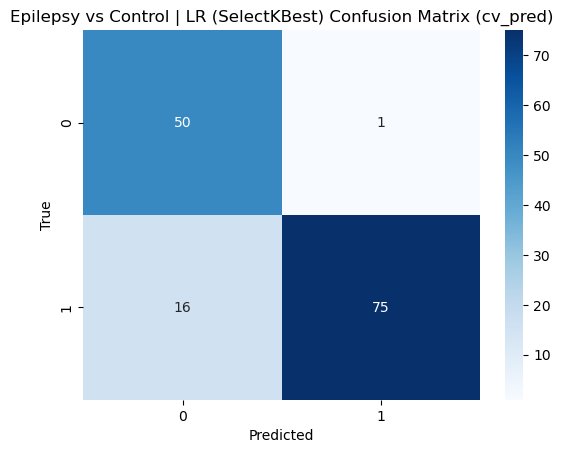


--- Epilepsy vs Control | RF (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.91      0.63      0.74        51
           1       0.82      0.97      0.89        91

    accuracy                           0.85       142
   macro avg       0.87      0.80      0.82       142
weighted avg       0.86      0.85      0.84       142



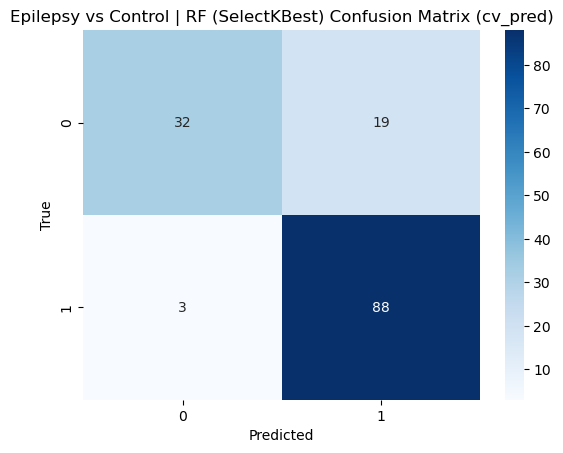


--- Epilepsy vs Control | SVC (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        51
           1       0.94      0.91      0.93        91

    accuracy                           0.91       142
   macro avg       0.90      0.91      0.90       142
weighted avg       0.91      0.91      0.91       142



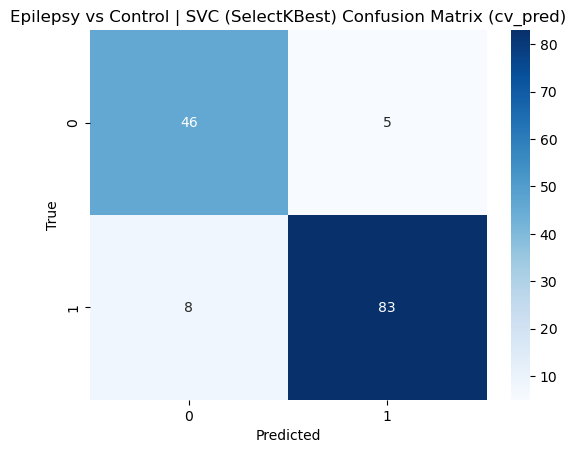

Model2 (Epilepsy Type) class distribution:
  0: 36
  1: 42
  2: 13

--- Subtype | LR (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.53      0.72      0.61        36
           1       0.82      0.55      0.66        42
           2       0.43      0.46      0.44        13

    accuracy                           0.60        91
   macro avg       0.59      0.58      0.57        91
weighted avg       0.65      0.60      0.61        91



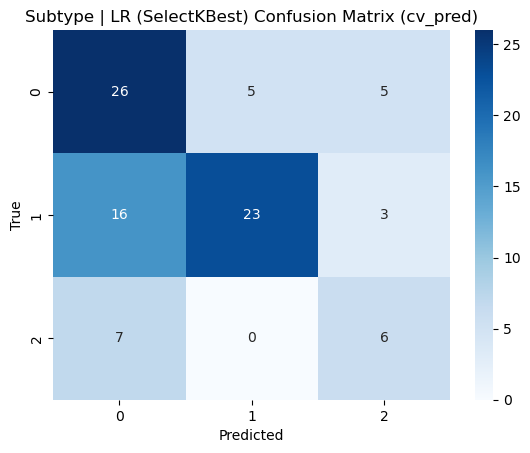


--- Subtype | RF (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.59      0.61      0.60        36
           1       0.61      0.79      0.69        42
           2       0.00      0.00      0.00        13

    accuracy                           0.60        91
   macro avg       0.40      0.47      0.43        91
weighted avg       0.52      0.60      0.56        91



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


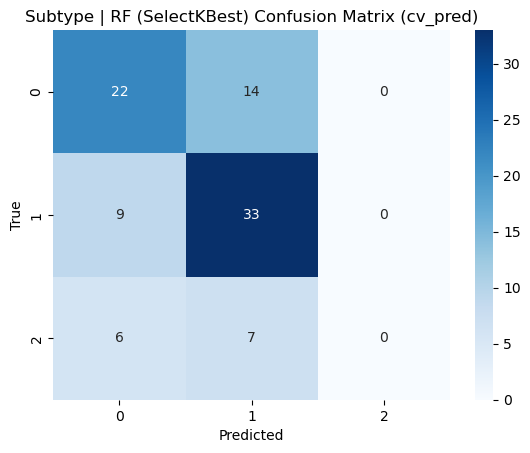


--- Subtype | LR (SMOTE) (CV=5) ---
              precision    recall  f1-score   support

           0       0.53      0.72      0.61        36
           1       0.82      0.55      0.66        42
           2       0.43      0.46      0.44        13

    accuracy                           0.60        91
   macro avg       0.59      0.58      0.57        91
weighted avg       0.65      0.60      0.61        91



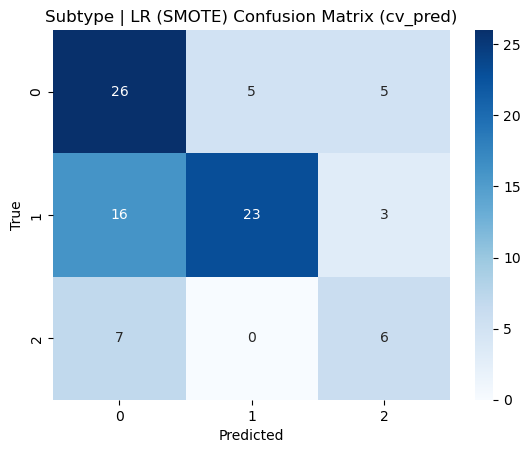


--- Subtype | RF (SMOTE) (CV=5) ---
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        36
           1       0.59      0.76      0.67        42
           2       0.00      0.00      0.00        13

    accuracy                           0.58        91
   macro avg       0.39      0.45      0.42        91
weighted avg       0.50      0.58      0.54        91



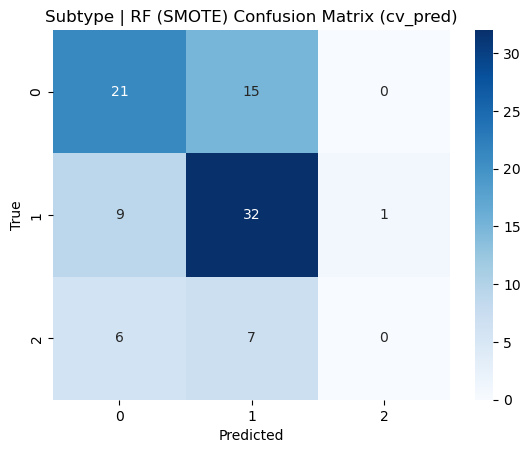

Model3 (Drug Response, with SMOTE) class distribution:
  0: 24
  1: 33

--- DrugResponse | LR (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        24
           1       0.79      0.79      0.79        33

    accuracy                           0.75        57
   macro avg       0.75      0.75      0.75        57
weighted avg       0.75      0.75      0.75        57



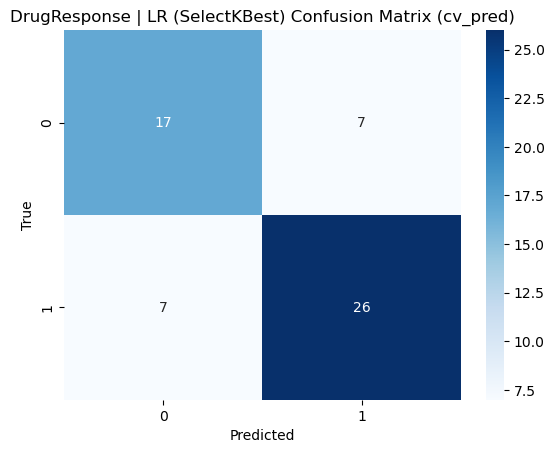


--- DrugResponse | RF (SelectKBest) (CV=5) ---
              precision    recall  f1-score   support

           0       0.57      0.33      0.42        24
           1       0.63      0.82      0.71        33

    accuracy                           0.61        57
   macro avg       0.60      0.58      0.57        57
weighted avg       0.60      0.61      0.59        57



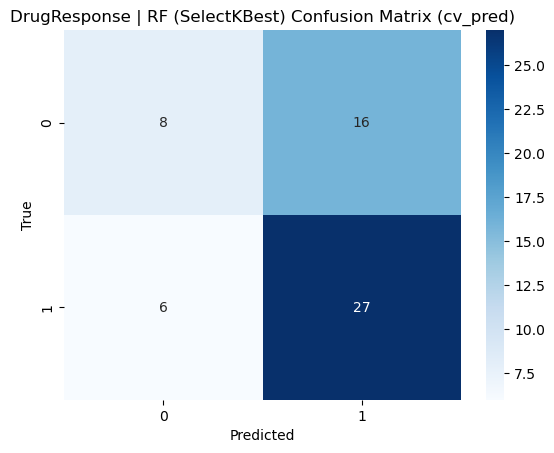


--- DrugResponse | LR (SMOTE) (CV=5) ---
              precision    recall  f1-score   support

           0       0.60      0.62      0.61        24
           1       0.72      0.70      0.71        33

    accuracy                           0.67        57
   macro avg       0.66      0.66      0.66        57
weighted avg       0.67      0.67      0.67        57



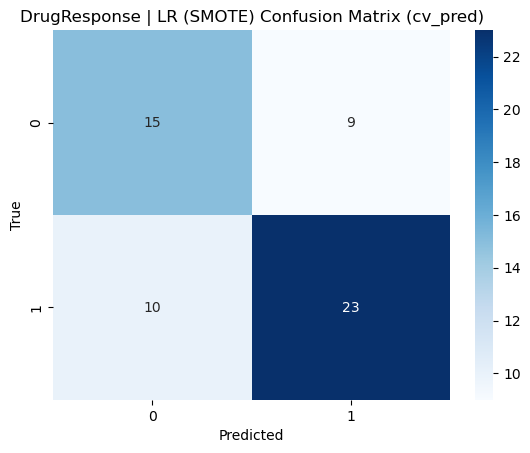


--- DrugResponse | RF (SMOTE) (CV=5) ---
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        24
           1       0.68      0.76      0.71        33

    accuracy                           0.65        57
   macro avg       0.64      0.63      0.63        57
weighted avg       0.64      0.65      0.64        57



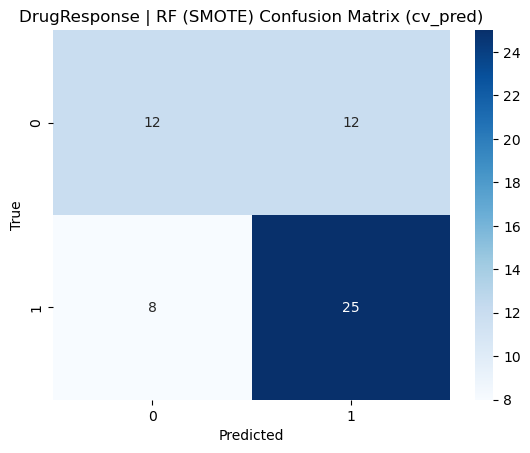

Best params (RF grid): {'clf__max_depth': None, 'clf__n_estimators': 100, 'select__k': 100}
Best CV score: 0.8378175091023387


In [181]:
# ML pipeline (robust) — uses ml_df explicitly
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# ------------ helper utilities ------------
def get_expr_cols(df):
    return [c for c in df.columns if str(c).startswith("ILMN_")]

def print_class_info(y, title=""):
    unique, counts = np.unique(y, return_counts=True)
    print(f"{title} class distribution:")
    for u, c in zip(unique, counts):
        print(f"  {u}: {c}")
    return dict(zip(unique, counts))

def choose_cv_splits(y, max_splits=5):
    """Choose number of CV splits based on minimum class count (stratified)."""
    _, counts = np.unique(y, return_counts=True)
    min_count = counts.min()
    # at least 2 splits required
    n_splits = min(max_splits, min_count) if min_count >= 2 else 2
    n_splits = max(2, n_splits)
    return n_splits

# ------------ prepare target & features function ------------
def prepare_X_y(df, target_col, use_only_labelled=True):
    """
    df: ml_df
    target_col: 'Condition' / 'Epilepsy Type' / 'Drug Response'
    use_only_labelled: if True, drop rows where target is NaN
    returns: X (dataframe), y (encoded labels), le (LabelEncoder), expr_cols
    """
    expr_cols = get_expr_cols(df)
    sub = df.copy()
    if use_only_labelled:
        sub = sub[sub[target_col].notna()].copy()
    X = sub[expr_cols].copy()
    y_raw = sub[target_col].astype(str).copy()
    # If some labels are the string "nan" from casting, convert to np.nan and drop if requested:
    y_raw = y_raw.replace({'nan': np.nan})
    if use_only_labelled:
        # after replacement, drop NA rows
        mask_notna = y_raw.notna()
        X = X.loc[mask_notna]
        y_raw = y_raw.loc[mask_notna]
    # Encode y
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    return X, y, le, expr_cols

# ------------ evaluation function using pipeline and cross-val predict ------------
def run_evaluation_pipeline(X_df, y, pipeline, model_name="Model", cv_splits=5):
    """
    X_df: DataFrame of features (genes)
    pipeline: sklearn Pipeline that ends with a classifier
    cv_splits: int
    """
    X = X_df.values  # pipeline expects array
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    # cross_val_predict to get predictions on held-out folds
    y_pred = cross_val_predict(pipeline, X, y, cv=skf, method='predict', n_jobs=-1)
    print(f"\n--- {model_name} (CV={cv_splits}) ---")
    print(classification_report(y, y_pred))
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix (cv_pred)")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.savefig(f"{model_name} Confusion Matrix (cv_pred)", dpi=300, bbox_inches="tight")
    plt.show()
    return y_pred

# ------------ base model definitions via pipeline ------------
def build_pipeline_selectk_clf(clf, k_features=2000):
    """
    Pipeline: scaler -> selectkbest -> classifier
    """
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=min(k_features, 5000))), # safe cap
        ('clf', clf)
    ])
    return pipe

def build_pipeline_pca_clf(clf, k_features=2000, n_pca=50):
    """
    Pipeline: scaler -> selectkbest -> PCA -> classifier
    """
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=min(k_features, 5000))),
        ('pca', PCA(n_components=n_pca)),
        ('clf', clf)
    ])
    return pipe


# New helper: Pipeline with SMOTE
def build_pipeline_smote_clf(clf, k_features=2000):
    """
    Pipeline: scaler -> selectkbest -> SMOTE -> classifier
    Works for imbalanced multiclass data (like epilepsy subtypes)
    """
    pipe = ImbPipeline([
        ('scaler', StandardScaler()),
        ('select', SelectKBest(score_func=f_classif, k=min(k_features, 5000))),
        ('smote', SMOTE(random_state=42)),
        ('clf', clf)
    ])
    return pipe


# ------------ Example run for Model 1: Epilepsy vs Control ------------
# Prepare data (use only labelled - in this case Condition is filled for all rows)
X1, y1, le1, expr_cols = prepare_X_y(ml_df, target_col="Condition", use_only_labelled=True)
print_class_info(y1, "Model1 (Condition)")
cv1 = choose_cv_splits(y1, max_splits=5)

# Pipelines (SelectKBest and PCA-variant)
lr = LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear', random_state=42)
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
sv = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)

pipe_lr_sk = build_pipeline_selectk_clf(lr, k_features=2000)
pipe_rf_sk = build_pipeline_selectk_clf(rf, k_features=2000)
pipe_svc_sk = build_pipeline_selectk_clf(sv, k_features=2000)

# Run CV evaluations (these are cross-validated predictions)
pred_lr = run_evaluation_pipeline(X1, y1, pipe_lr_sk, model_name="Epilepsy vs Control | LR (SelectKBest)", cv_splits=cv1)
pred_rf = run_evaluation_pipeline(X1, y1, pipe_rf_sk, model_name="Epilepsy vs Control | RF (SelectKBest)", cv_splits=cv1)
pred_svc = run_evaluation_pipeline(X1, y1, pipe_svc_sk, model_name="Epilepsy vs Control | SVC (SelectKBest)", cv_splits=cv1)

# ---- Fit final model on all data (Model 1) ----
pipe_lr_sk.fit(X1, y1)
best_lr_model1 = pipe_lr_sk  # save trained model for SHAP use




# ------------ Example run for Model 2: Subtype classification (only Epilepsy rows) with smote ------------
df_epilepsy = ml_df[ml_df["Condition"] == "Epilepsy"].copy()
X2, y2, le2, expr_cols = prepare_X_y(df_epilepsy, target_col="Epilepsy Type", use_only_labelled=True)
print_class_info(y2, "Model2 (Epilepsy Type)")
cv2 = choose_cv_splits(y2, max_splits=5)  # may be smaller if classes imbalanced


pipe_lr_sk2 = build_pipeline_selectk_clf(LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear', random_state=42), k_features=2000)
pipe_rf_sk2 = build_pipeline_selectk_clf(RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42), k_features=2000)

pred_lr2 = run_evaluation_pipeline(X2, y2, pipe_lr_sk2, model_name="Subtype | LR (SelectKBest)", cv_splits=cv2)
pred_rf2 = run_evaluation_pipeline(X2, y2, pipe_rf_sk2, model_name="Subtype | RF (SelectKBest)", cv_splits=cv2)

pipe_lr_smote2 = build_pipeline_smote_clf(LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear', random_state=42), k_features=2000)
pipe_rf_smote2 = build_pipeline_smote_clf(RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42), k_features=2000)


pred_lr2 = run_evaluation_pipeline(X2, y2, pipe_lr_smote2, model_name="Subtype | LR (SMOTE)", cv_splits=cv2)
pred_rf2 = run_evaluation_pipeline(X2, y2, pipe_rf_smote2, model_name="Subtype | RF (SMOTE)", cv_splits=cv2)

# ---- Fit final model on all data (Model 2) ----
pipe_lr_sk2.fit(X2, y2)
best_lr_model2 = pipe_lr_sk2





# ------------ Model 3 (Drug Response) with SMOTE ------------
df_dr = ml_df[ml_df["Drug Response"].notna()].copy()
X3, y3, le3, expr_cols = prepare_X_y(df_dr, target_col="Drug Response", use_only_labelled=True)
print_class_info(y3, "Model3 (Drug Response, with SMOTE)")
cv3 = choose_cv_splits(y3, max_splits=5)


pipe_lr_sk3 = build_pipeline_selectk_clf(LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear', random_state=42), k_features=2000)
pipe_rf_sk3 = build_pipeline_selectk_clf(RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42), k_features=2000)

pred_lr3 = run_evaluation_pipeline(X3, y3, pipe_lr_sk3, model_name="DrugResponse | LR (SelectKBest)", cv_splits=cv3)
pred_rf3 = run_evaluation_pipeline(X3, y3, pipe_rf_sk3, model_name="DrugResponse | RF (SelectKBest)", cv_splits=cv3)

# ---- Fit final model on all data (Model 3) ----
pipe_lr_sk3.fit(X3, y3)
best_lr_model3 = pipe_lr_sk3

# Pipelines with SMOTE
pipe_lr_smote3 = build_pipeline_smote_clf(
    LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear', random_state=42),
    k_features=300
)

pipe_rf_smote3 = build_pipeline_smote_clf(
    RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    k_features=300
)

# Run CV evaluations
pred_lr3_smote = run_evaluation_pipeline(X3, y3, pipe_lr_smote3,
    model_name="DrugResponse | LR (SMOTE)", cv_splits=cv3)

pred_rf3_smote = run_evaluation_pipeline(X3, y3, pipe_rf_smote3,
    model_name="DrugResponse | RF (SMOTE)", cv_splits=cv3)



# ------------ Hyperparameter tuning example (GridSearchCV for RandomForest on Model1) ------------
# Note: this runs on whole X1,y1 and uses internal CV (be mindful of time)
param_grid = {
    'select__k': [100, 300, 500,1000,1500,2000],              # number of top genes to keep
    'clf__n_estimators': [100, 200],           # RF trees
    'clf__max_depth': [None, 10, 30]
}
grid_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif)),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])
cv_for_grid = StratifiedKFold(n_splits=min(5, choose_cv_splits(y1, 5)), shuffle=True, random_state=42)
grid = GridSearchCV(grid_pipe, param_grid=param_grid, cv=cv_for_grid, scoring='f1_macro', n_jobs=-1)
grid.fit(X1.values, y1)
print("Best params (RF grid):", grid.best_params_)
print("Best CV score:", grid.best_score_)


In [138]:
!pip install shap

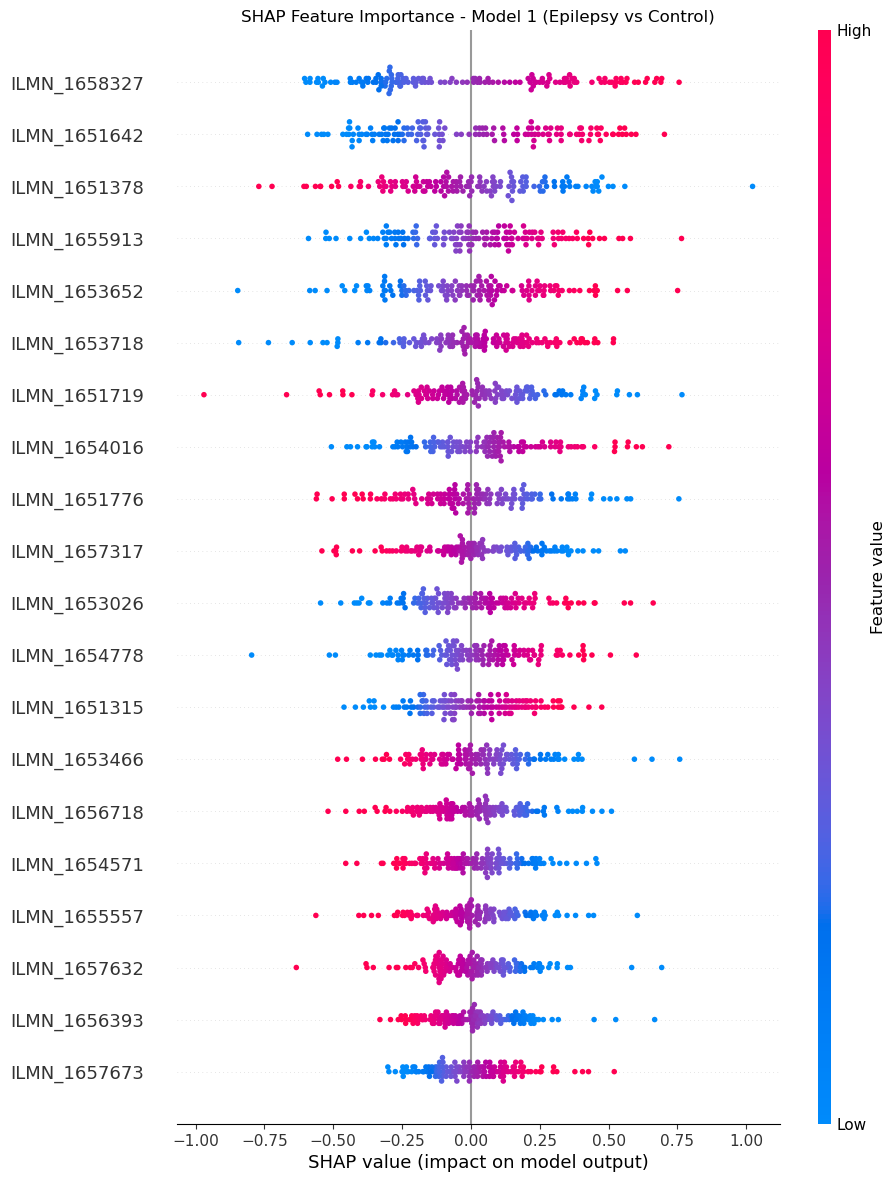

In [161]:
'''
import shap
import matplotlib.pyplot as plt

# Create SHAP explainer for logistic regression model
explainer = shap.Explainer(best_lr_model1, X1)
shap_values = explainer(X1)

# Plot summary plot for top genes
plt.title("SHAP Feature Importance - Model 1 (Epilepsy vs Control)")
shap.summary_plot(shap_values, X1, plot_type="bar", max_display=20)
'''
# --- SHAP for Model 1 (Epilepsy vs Control | LR) ---
import shap
import matplotlib.pyplot as plt

# ---- Extract the classifier and transformed data ----
final_model = best_lr_model1.named_steps['clf']  # get logistic regression
X1_transformed = best_lr_model1.named_steps['select'].transform(
    best_lr_model1.named_steps['scaler'].transform(X1)
)

# ---- Create SHAP explainer for the logistic regression ----
explainer = shap.LinearExplainer(final_model, X1_transformed)
shap_values = explainer(X1_transformed)


# ---- Plot + Save ----
#plt.figure(figsize=(10, 12))
shap.summary_plot(
    shap_values,
    X1_transformed,
    feature_names=X1.columns[:X1_transformed.shape[1]],
    show=False   # IMPORTANT
)
plt.title("SHAP Feature Importance - Model 1 (Epilepsy vs Control)")
plt.gcf().set_size_inches(10, 12)
plt.savefig("Model1_SHAP_summary.png", dpi=300, bbox_inches='tight')
plt.close(fig)


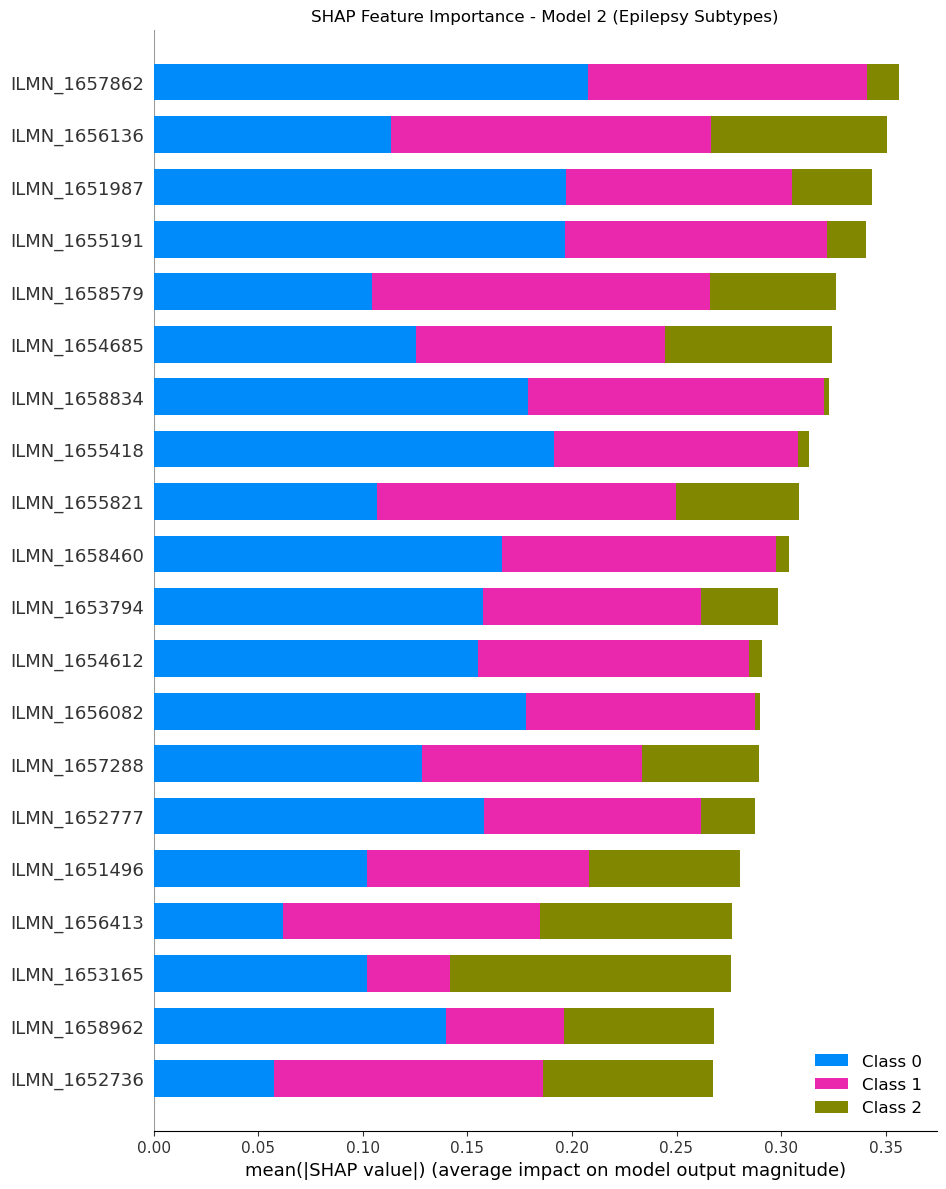

In [163]:
# --- SHAP for Model 2 (Epilepsy Subtype | LR) ---
import shap
import matplotlib.pyplot as plt

# Extract the trained classifier and transformed features
final_model2 = best_lr_model2.named_steps['clf']
X2_transformed = best_lr_model2.named_steps['select'].transform(
    best_lr_model2.named_steps['scaler'].transform(X2)
)

# Create SHAP explainer and compute SHAP values
explainer2 = shap.LinearExplainer(final_model2, X2_transformed)
shap_values2 = explainer2(X2_transformed)

# Plot SHAP summary
#plt.title("SHAP Feature Importance - Model 2 (Epilepsy Subtypes)")
shap.summary_plot(shap_values2, X2_transformed, feature_names=X2.columns[:X2_transformed.shape[1]],show=False)
plt.title("SHAP Feature Importance - Model 2 (Epilepsy Subtypes)")
plt.gcf().set_size_inches(10, 12)
plt.savefig("Model2_SHAP_summary.png", dpi=300, bbox_inches='tight')
plt.close(fig)

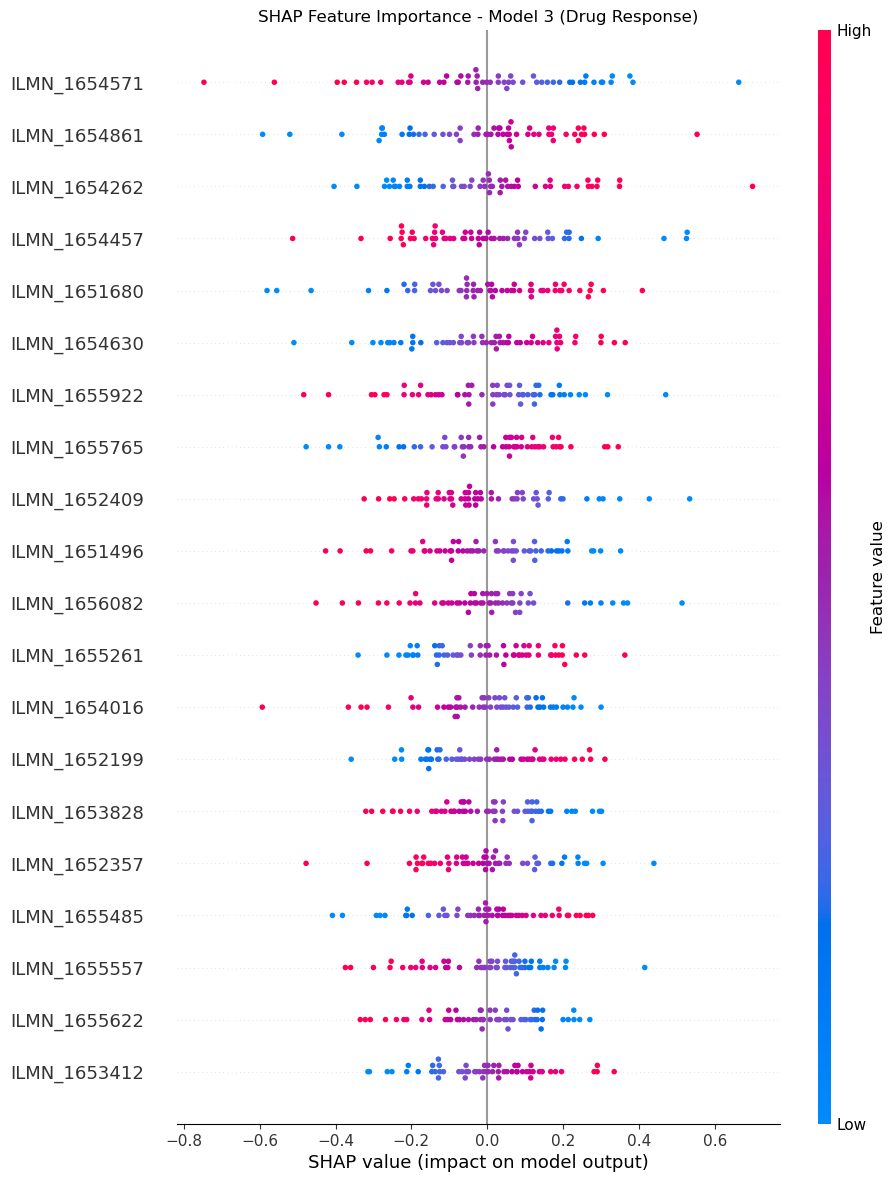

In [167]:
# --- SHAP for Model 3 (Drug Response | LR) ---
import shap
import matplotlib.pyplot as plt

# Extract the trained classifier and transformed features
final_model3 = best_lr_model3.named_steps['clf']
X3_transformed = best_lr_model3.named_steps['select'].transform(
    best_lr_model3.named_steps['scaler'].transform(X3)
)

# Create SHAP explainer and compute SHAP values
explainer3 = shap.LinearExplainer(final_model3, X3_transformed)
shap_values3 = explainer3(X3_transformed)

# Plot SHAP summary
#plt.title("SHAP Feature Importance - Model 3 (Drug Response)")
shap.summary_plot(shap_values3, X3_transformed, feature_names=X3.columns[:X3_transformed.shape[1]],show=False)
plt.title("SHAP Feature Importance - Model 3 (Drug Response)")
plt.gcf().set_size_inches(10, 12)
plt.savefig("Model3_SHAP_summary.png", dpi=300, bbox_inches='tight')
plt.close(fig)

### map probe for gene name

In [146]:
import pandas as pd

# Step 1: Find where the data starts (the line after "[Probes]")
with open("/Users/tabish/Desktop/Data Science project/GPL10558_HumanHT-12_V4_0_R2_15002873_B.txt", 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Find the line index where the '[Probes]' section begins
start_idx = None
for i, line in enumerate(lines):
    if line.strip() == "[Probes]":
        start_idx = i + 1
        break

print(f"✅ Data table starts at line {start_idx+1}")

# Step 2: Load only the data part
annot = pd.read_csv(
    "GPL10558_HumanHT-12_V4_0_R2_15002873_B.txt",
    sep="\t",
    skiprows=start_idx,
    low_memory=False
)

# Step 3: Check the first few columns
print("Columns in file:\n", annot.columns.tolist())

# Step 4: Extract probe-to-gene mapping
if "Probe_Id" in annot.columns and "Symbol" in annot.columns:
    mapping = annot[["Probe_Id", "Symbol"]].dropna()
else:
    raise ValueError("⚠️ Could not find 'Probe_Id' or 'Symbol' column in annotation file.")

# Step 5: Create mapping dictionary
probe_to_gene = dict(zip(mapping["Probe_Id"], mapping["Symbol"]))

print(f"✅ Loaded {len(probe_to_gene)} probe → gene mappings")

# Step 6: Test mapping on a few probe names
test_probes = list(probe_to_gene.items())[:10]
print("Sample mappings:\n", test_probes)


✅ Data table starts at line 9
Columns in file:
 ['Species', 'Source', 'Search_Key', 'Transcript', 'ILMN_Gene', 'Source_Reference_ID', 'RefSeq_ID', 'Unigene_ID', 'Entrez_Gene_ID', 'GI', 'Accession', 'Symbol', 'Protein_Product', 'Probe_Id', 'Array_Address_Id', 'Probe_Type', 'Probe_Start', 'Probe_Sequence', 'Chromosome', 'Probe_Chr_Orientation', 'Probe_Coordinates', 'Cytoband', 'Definition', 'Ontology_Component', 'Ontology_Process', 'Ontology_Function', 'Synonyms', 'Obsolete_Probe_Id']
✅ Loaded 44053 probe → gene mappings
Sample mappings:
 [('ILMN_3166687', 'ERCC-00162'), ('ILMN_3165565', 'ERCC-00071'), ('ILMN_3164808', 'ERCC-00009'), ('ILMN_3165363', 'ERCC-00053'), ('ILMN_3166504', 'ERCC-00144'), ('ILMN_3164750', 'ERCC-00003'), ('ILMN_3166430', 'ERCC-00138'), ('ILMN_3165745', 'ERCC-00084'), ('ILMN_3164915', 'ERCC-00017'), ('ILMN_3165415', 'ERCC-00057')]


In [148]:
# Step 1: Extract all probe IDs from your dataset
expr_cols = [c for c in ml_df.columns if c.startswith("ILMN_")]
print(f"Total probes in your dataset: {len(expr_cols)}")

# Step 2: Count how many of them exist in annotation mapping
matched = [p for p in expr_cols if p in probe_to_gene]
unmatched = [p for p in expr_cols if p not in probe_to_gene]

print(f"✅ Probes matched in annotation: {len(matched)}")
print(f"❌ Probes not found in annotation: {len(unmatched)}")

# Step 3: Display a few examples
print("\nSample matched probes:", matched[:10])
print("\nSample unmatched probes:", unmatched[:10])


Total probes in your dataset: 13165
✅ Probes matched in annotation: 12830
❌ Probes not found in annotation: 335

Sample matched probes: ['ILMN_1343291', 'ILMN_1343295', 'ILMN_1651228', 'ILMN_1651229', 'ILMN_1651254', 'ILMN_1651262', 'ILMN_1651278', 'ILMN_1651282', 'ILMN_1651296', 'ILMN_1651315']

Sample unmatched probes: ['ILMN_1816244', 'ILMN_1816342', 'ILMN_1816603', 'ILMN_1816713', 'ILMN_1817124', 'ILMN_1817255', 'ILMN_1817275', 'ILMN_1817377', 'ILMN_1818149', 'ILMN_1818577']


In [217]:
# Step 1: Keep only matched probes
expr_df = ml_df[[c for c in ml_df.columns if c in probe_to_gene]]

# Step 2: Rename probe IDs to gene symbols
expr_df = expr_df.rename(columns=probe_to_gene)

# Step 3: Collapse duplicate gene names (mean expression across multiple probes)
expr_df = expr_df.groupby(expr_df.columns, axis=1).mean()

# Step 4: Combine back with metadata columns
meta_cols = ['Condition', 'Epilepsy Type', 'Drug', 'Drug Response', 'Sex', 'Age']
meta_cols = [c for c in meta_cols if c in ml_df.columns]  # only existing ones

ml_df_mapped = pd.concat([ml_df[meta_cols], expr_df], axis=1)

print(f"✅ Final dataset shape after mapping: {ml_df_mapped.shape}")
print(f"🧬 Example gene columns: {ml_df_mapped.columns[6:16].tolist()}")

# Display the full merged dataframe
display(ml_df_mapped)

# Save full dataset for ML
ml_df_mapped.to_csv("epilepsy_dataset_new_genename.csv", index=False)



✅ Final dataset shape after mapping: (142, 10567)
🧬 Example gene columns: ['A2LD1', 'AADACL1', 'AAGAB', 'AAK1', 'AAMP', 'AARS', 'AARS2', 'AARSD1', 'AASDH', 'AASDHPPT']


/var/folders/5c/dt9mwqm92d73ytztv803xhvr0000gn/T/ipykernel_49660/850010289.py:8: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  expr_df = expr_df.groupby(expr_df.columns, axis=1).mean()


,Condition,Epilepsy Type,Drug,Drug Response,Sex,Age,A2LD1,AADACL1,AAGAB,AAK1,...,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,dJ341D10.1
0,Control,NaN,None,NaN,Female,26,5.529968,5.325371,6.166417,5.549871,...,6.340883,6.018425,7.055237,5.021935,5.974820,9.089510,9.354921,6.170351,5.935234,6.394945
1,Epilepsy,Idiopathic,VA,Non-responder,Male,28,6.362004,5.348209,5.915127,5.434976,...,6.403215,6.412274,7.602953,5.351126,5.532063,8.494331,8.780485,5.685457,6.433315,5.377525
2,Control,NaN,None,NaN,Male,29,5.822064,5.241936,5.843318,5.401857,...,7.570701,5.924428,6.927054,5.139035,5.749649,8.608461,9.086207,5.880481,5.830548,5.896775
3,Control,NaN,None,NaN,Male,28,5.618603,5.162917,6.035075,5.708400,...,7.615309,5.957230,7.081166,4.830052,5.418674,8.833745,9.404666,6.227946,5.776211,5.992021
4,Epilepsy,Symptomatic,None,NaN,Male,32,5.832988,5.222790,5.654042,5.795576,...,7.434722,6.081494,7.200077,5.347232,5.962018,8.509337,8.753982,6.084849,6.142920,5.863753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Epilepsy,Idiopathic,VA,Responder,Female,26,5.173922,5.450023,6.073269,5.348212,...,7.063618,6.177057,6.935659,4.572546,5.686404,8.165042,9.188505,6.136378,5.872362,6.045940
138,Epilepsy,Idiopathic,CBZ,Non-responder,Female,21,6.994206,5.141311,5.552828,5.240103,...,6.251472,5.793779,7.444592,5.046460,5.876986,8.614523,9.597134,5.926743,5.905023,5.937603
139,Epilepsy,Idiopathic,VA,Responder,Male,23,5.980236,5.377644,6.446819,6.101297,...,7.239955,6.538558,7.481654,5.198901,5.743355,8.767008,9.355485,6.239097,6.096353,5.351725
140,Epilepsy,Idiopathic,VA,Responder,Male,31,5.882817,5.232453,6.298128,5.234311,...,7.232128,6.056107,6.846765,4.665610,5.769983,8.360828,9.512063,5.823074,5.574650,5.569989


### identifying differentially expressed gene(epilepsy vs control)after changing probe name with gene name

In [193]:
# Full robust DEG pipeline (Epilepsy vs Control) — run in one cell
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# Work on a copy
df_work = ml_df_mapped.copy()   # mapped_df = your gene-level dataframe

# ---------- 1) Inspect the Condition column ----------
print(">>> CONDITION COLUMN INSPECTION")
print("dtype:", df_work['Condition'].dtype)
print("unique (raw):", pd.unique(df_work['Condition'])[:50])
print("\nvalue_counts (raw):\n", df_work['Condition'].value_counts(dropna=False))

# show repr to reveal hidden quotes/spaces
print("\nSample repr values (showing quotes/spaces):")
print(pd.Series(df_work['Condition'].astype(str).apply(repr)).unique()[:30])

# ---------- 2) Clean Condition column (strip, remove quotes, make lowercase) ----------
df_work['Condition_clean'] = (
    df_work['Condition']
    .astype(str)            # ensure strings
    .str.replace('"', '')   # remove double quotes if any
    .str.replace("'", "")   # remove single quotes if any
    .str.strip()            # trim whitespace both sides
    .str.lower()            # lowercase for uniformity
)

# Map likely variants to standard labels
df_work['Condition_clean'] = df_work['Condition_clean'].replace({
    'healthy control': 'control',
    'healthy': 'control',
    'control ': 'control',
    'controls': 'control',
    'epileptic': 'epilepsy',
    'epilepsy ': 'epilepsy'
})

print("\nunique after cleaning:", df_work['Condition_clean'].unique())
print("\nvalue_counts after cleaning:\n", df_work['Condition_clean'].value_counts(dropna=False))

# ---------- 3) Define groups and sanity-check sizes ----------
case = df_work[df_work['Condition_clean'] == 'epilepsy']
control = df_work[df_work['Condition_clean'] == 'control']
print(f"\nGroup sizes -> epilepsy: {len(case)}, control: {len(control)}")
if len(case) == 0 or len(control) == 0:
    raise ValueError("One of the groups is empty after cleaning Condition. Inspect unique values above.")

# ---------- 4) Identify gene columns robustly ----------
meta_cols = ['Condition', 'Condition_clean', 'Epilepsy Type', 'Drug', 'Drug Response', 'Sex', 'Age', 'Title', 'SampleID', 'Treatment']
gene_cols = [c for c in df_work.columns if c not in meta_cols]
print(f"\nNumber of gene columns found: {len(gene_cols)}")

# ---------- 5) Ensure gene columns are numeric ----------
df_work[gene_cols] = df_work[gene_cols].apply(pd.to_numeric, errors='coerce')

# Quick check: how many genes have mostly-NaN?
nan_frac = df_work[gene_cols].isna().mean().sort_values()
print("\nTop 8 genes with lowest NA fraction (example):")
print(nan_frac.head(8))
print("\nTop 8 genes with highest NA fraction (example):")
print(nan_frac.tail(8))

# ---------- 6) Keep genes with enough observations in both groups ----------
min_nonnull_per_group = 5   # adjust if you want stricter
keep_genes = []
for g in gene_cols:
    if (case[g].count() >= min_nonnull_per_group) and (control[g].count() >= min_nonnull_per_group):
        keep_genes.append(g)
print(f"\nGenes kept for t-tests (>= {min_nonnull_per_group} non-null per group): {len(keep_genes)} / {len(gene_cols)}")

if len(keep_genes) == 0:
    raise ValueError("No genes passed the minimum non-null threshold. Try reducing min_nonnull_per_group or inspect your data.")

# ---------- 7) Run t-tests (vectorized loop) and compute log2 fold-change ----------
results = []
for gene in keep_genes:
    case_vals = case[gene].dropna()
    ctrl_vals = control[gene].dropna()
    t_stat, p_val = ttest_ind(case_vals, ctrl_vals, equal_var=False)
    # log2 fold change (Epilepsy - Control); add small constant to avoid log(0)
    log2fc = np.log2(case_vals.mean() + 1e-9) - np.log2(ctrl_vals.mean() + 1e-9)
    results.append((gene, float(t_stat), float(p_val), float(log2fc)))

deg_df = pd.DataFrame(results, columns=['Gene', 't_stat', 'p_val', 'log2FC'])

# ---------- 8) Multiple testing correction ----------
deg_df['FDR'] = multipletests(deg_df['p_val'], method='fdr_bh')[1]
deg_df = deg_df.sort_values('FDR').reset_index(drop=True)

# ---------- 9) Save and show top hits ----------
deg_df.to_csv("DEG_Epilepsy_vs_Control_genelevel.csv", index=False)
print("\nSaved DEG results to 'DEG_Epilepsy_vs_Control_genelevel.csv'")

print("\nTop 20 DEGs (by FDR):")
display(deg_df.head(20))


>>> CONDITION COLUMN INSPECTION
dtype: object
unique (raw): ['Control' 'Epilepsy']

value_counts (raw):
 Condition
Epilepsy    91
Control     51
Name: count, dtype: int64

Sample repr values (showing quotes/spaces):
["'Control'" "'Epilepsy'"]

unique after cleaning: ['control' 'epilepsy']

value_counts after cleaning:
 Condition_clean
epilepsy    91
control     51
Name: count, dtype: int64

Group sizes -> epilepsy: 91, control: 51

Number of gene columns found: 10561

Top 8 genes with lowest NA fraction (example):
A2LD1    0.0
PHB2     0.0
PHC2     0.0
PHC3     0.0
PHCA     0.0
PHF1     0.0
PHF10    0.0
PHF11    0.0
dtype: float64

Top 8 genes with highest NA fraction (example):
HBP1          0.0
HBQ1          0.0
HBXIP         0.0
HCCA2         0.0
HCCS          0.0
HCFC1         0.0
HCG26         0.0
dJ341D10.1    0.0
dtype: float64

Genes kept for t-tests (>= 5 non-null per group): 10561 / 10561

Saved DEG results to 'DEG_Epilepsy_vs_Control_genelevel.csv'

Top 20 DEGs (by FDR):


,Gene,t_stat,p_val,log2FC,FDR
0,HLA-B,10.269076,1.833422e-18,0.041232,1.936277e-14
1,UBN2,-8.328374,4.333636e-13,-0.072171,2.288376e-09
2,CD37,7.857484,2.197675e-12,0.059900,5.802411e-09
3,DDX27,-7.901932,1.773604e-12,-0.074015,5.802411e-09
4,ZDHHC12,7.556805,8.035397e-12,0.108465,1.414364e-08
...,...,...,...,...,...
15,TBXAS1,7.343546,3.152100e-11,0.052769,2.228872e-08
16,ECGF1,7.194536,4.176328e-11,0.097750,2.582112e-08
17,SDF2L1,-7.209474,4.400910e-11,-0.061679,2.582112e-08
18,PPIG,-7.144794,4.920981e-11,-0.062243,2.735289e-08


In [179]:
# load deg df (if not in memory)
deg_df = pd.read_csv("DEG_Epilepsy_vs_Control_genelevel.csv")

# compute fold change (not log)
deg_df['FoldChange'] = 2 ** deg['log2FC']
deg_df[['Gene','t_stat','p_val','log2FC','FoldChange','FDR']].head(10)


,Gene,t_stat,p_val,log2FC,FoldChange,FDR
0,HLA-B,10.269076,1.833422e-18,0.041232,1.028992,1.936277e-14
1,UBN2,-8.328374,4.333636e-13,-0.072171,0.951206,2.288376e-09
2,CD37,7.857484,2.197675e-12,0.059900,1.042394,5.802411e-09
3,DDX27,-7.901932,1.773604e-12,-0.074015,0.949990,5.802411e-09
4,ZDHHC12,7.556805,8.035397e-12,0.108465,1.078080,1.414364e-08
5,ACTB,7.690925,7.134166e-12,0.023200,1.016211,1.414364e-08
6,TNFSF14,7.480636,1.216734e-11,0.075475,1.053708,1.820501e-08
7,MRPS31,-7.366202,1.379037e-11,-0.053775,0.963412,1.820501e-08
8,LRSAM1,7.432305,1.932569e-11,0.060695,1.042968,1.864785e-08
9,MLX,7.345476,1.970075e-11,0.080059,1.057061,1.864785e-08


### Volcano plot (p vs log2FC)

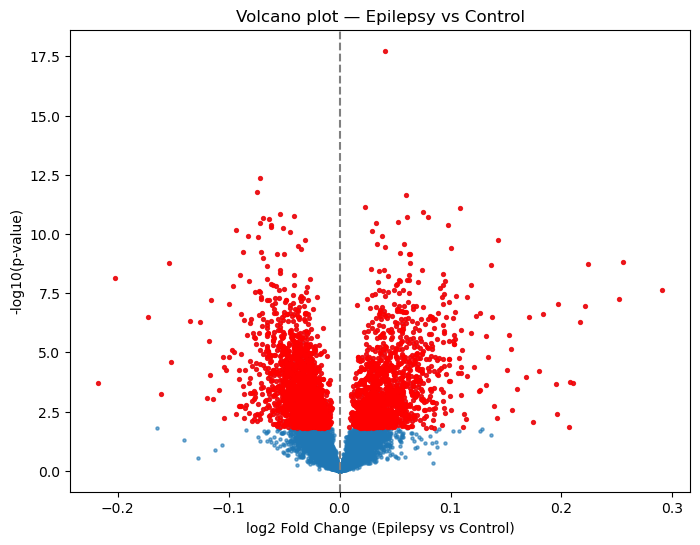

In [181]:
import matplotlib.pyplot as plt
import numpy as np

# quick volcano
deg_df['neglog10p'] = -np.log10(deg['p_val'])
plt.figure(figsize=(8,6))
plt.scatter(deg_df['log2FC'], deg_df['neglog10p'], s=5, alpha=0.6)
# highlight significant genes (example FDR<0.05)
sig = deg_df['FDR'] < 0.05
plt.scatter(deg_df.loc[sig, 'log2FC'], deg_df.loc[sig, 'neglog10p'], s=8, alpha=0.8, c='red')
plt.xlabel('log2 Fold Change (Epilepsy vs Control)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano plot — Epilepsy vs Control')
plt.axvline(0, color='grey', linestyle='--')
plt.savefig("volcanoplot_epilepsyvscontrol.png", dpi=300, bbox_inches="tight")
plt.show()


### Heatmap of top 50 genes

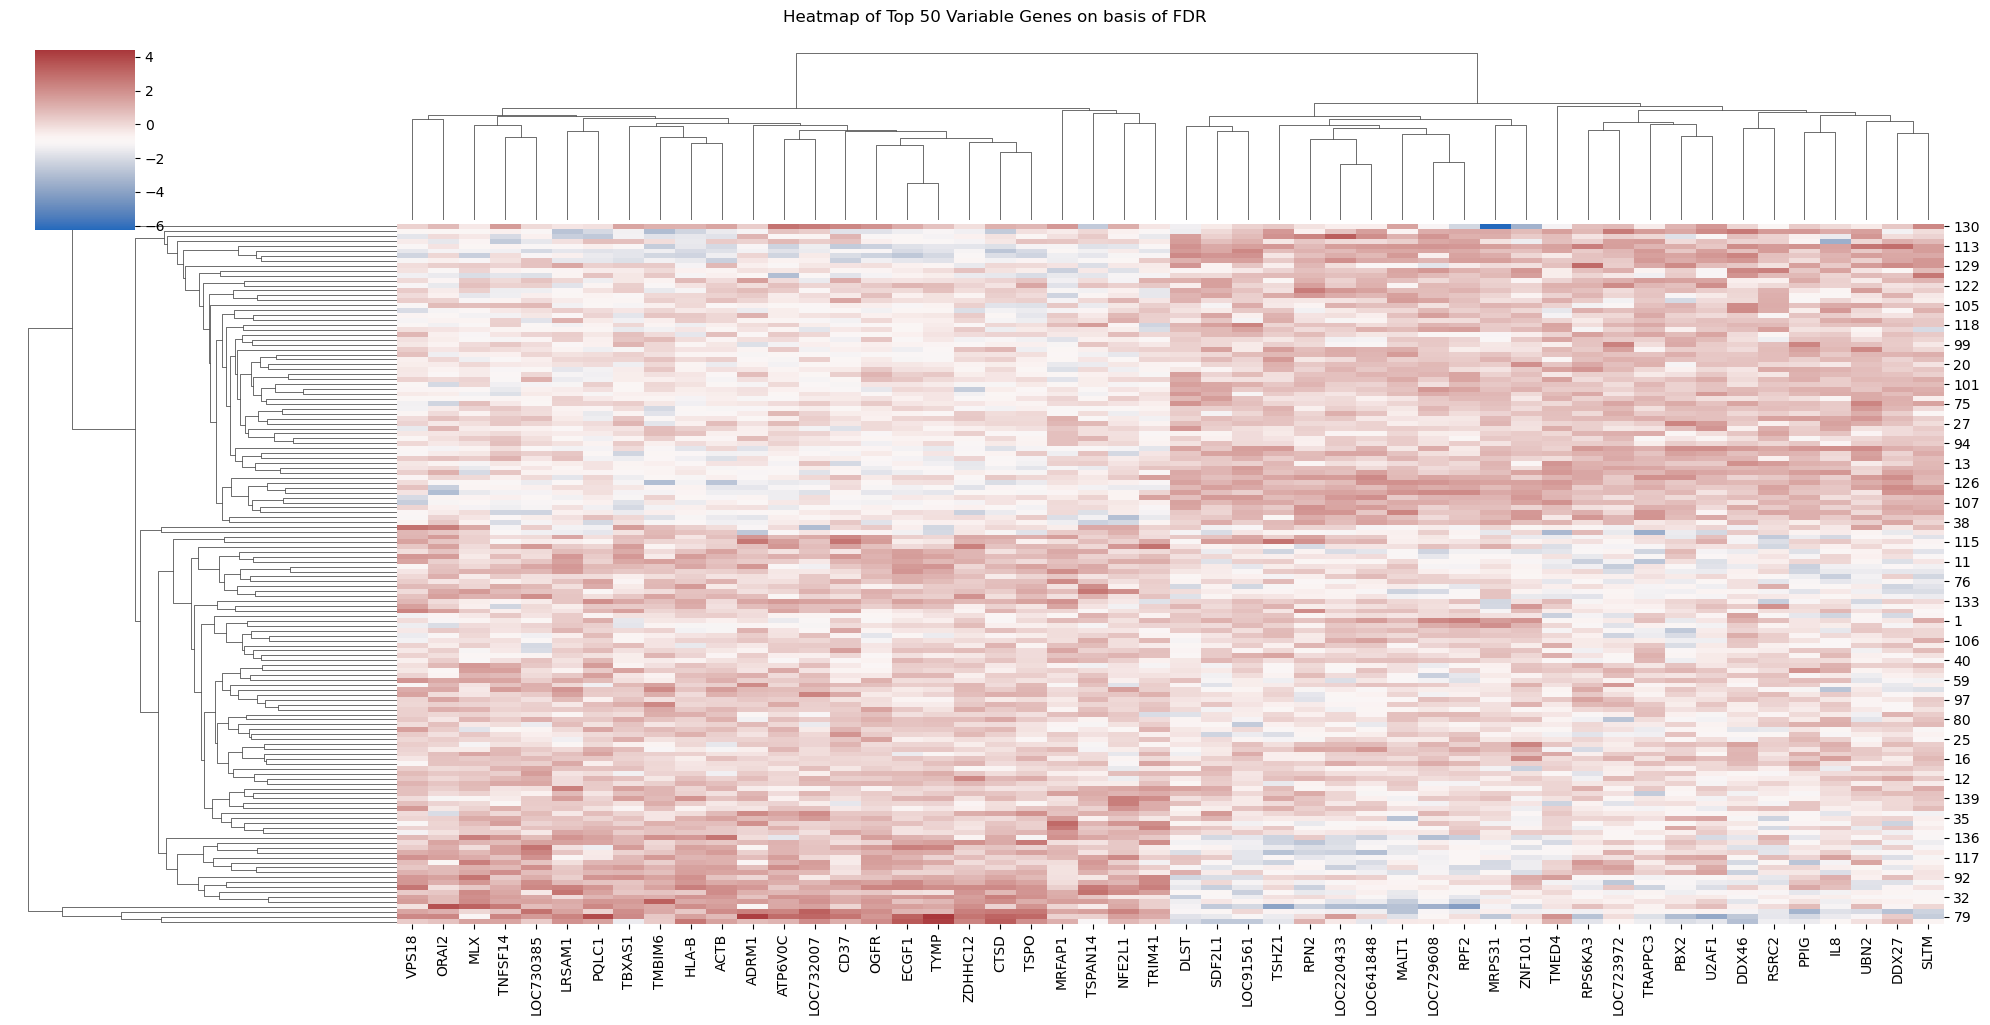

In [201]:
import seaborn as sns
# select top 50 by FDR
topN = deg_df.sort_values('FDR').head(50)['Gene'].tolist()

# expression matrix for top genes (samples × genes)
expr_top = ml_df_mapped[topN].copy()  # if SampleID present, otherwise use index

# z-score per gene for visualization
expr_z = expr_top.apply(lambda x: (x - x.mean()) / x.std(), axis=0)

# create a clustermap (rows = samples, cols = genes)
sns.clustermap(expr_z, figsize=(20,10), cmap='vlag', row_cluster=True, col_cluster=True)
plt.suptitle("Heatmap of Top 50 Variable Genes on basis of FDR", y=1.02)
plt.savefig("DEG_heatmap_top50_genes.png", dpi=300, bbox_inches="tight")
plt.show()


In [205]:
! pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.3/530.3 kB 3.4 MB/s eta 0:00:00


In [221]:
import requests
url = "https://maayanlab.cloud/Enrichr/view"
print("✅ Online!") if requests.get(url).status_code == 200 else print("❌ Can't reach Enrichr")


✅ Online!


In [225]:
import gseapy as gp

top_genes = deg_df[deg_df['FDR'] < 0.05].head(300)['Gene'].tolist()

enr = gp.enrichr(
    gene_list=top_genes,
    gene_sets=["GO_Biological_Process_2021.gmt", "KEGG_2019_Human.gmt"],
    organism="Human",
    outdir="enrichr_results_local",
    no_plot=True
)

enr.results.head(10)


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2021.gmt,'de novo' posttranslational protein folding (G...,1/31,0.337667,0.482036,3.681767,3.997274,SDF2L1
1,GO_Biological_Process_2021.gmt,2-oxoglutarate metabolic process (GO:0006103),1/14,0.169687,0.378904,8.327679,14.771654,DLST
2,GO_Biological_Process_2021.gmt,3'-UTR-mediated mRNA stabilization (GO:0070935),1/18,0.212674,0.402986,6.422465,9.941928,HNRNPC
3,GO_Biological_Process_2021.gmt,5S class rRNA transcription by RNA polymerase ...,1/6,0.076581,0.360177,20.451770,52.548893,GTF3C6
4,GO_Biological_Process_2021.gmt,ATP transport (GO:0015867),1/12,0.147325,0.371300,9.777298,18.724649,SLC25A24
5,GO_Biological_Process_2021.gmt,ATP-dependent chromatin remodeling (GO:0043044),3/42,0.017788,0.233690,6.697504,26.985637,INO80;ACTB;HNRNPC
6,GO_Biological_Process_2021.gmt,Arp2/3 complex-mediated actin nucleation (GO:0...,1/15,0.180648,0.381179,7.752830,13.266696,ARPC4
7,GO_Biological_Process_2021.gmt,B cell activation (GO:0042113),3/85,0.102134,0.365306,3.197305,7.294562,MALT1;RASGRP1;LYL1
8,GO_Biological_Process_2021.gmt,B cell differentiation (GO:0030183),1/61,0.555812,0.626823,1.852312,1.087911,LYL1
9,GO_Biological_Process_2021.gmt,B cell proliferation (GO:0042100),1/32,0.346421,0.483166,3.564643,3.778883,RASGRP1


In [231]:
import pandas as pd
go = pd.read_csv("/Users/tabish/Desktop/Data Science project/enrichr_results_local/GO_Biological_Process_2021.gmt.Human.enrichr.reports.txt", sep="\t")
kegg = pd.read_csv("/Users/tabish/Desktop/Data Science project/enrichr_results_local/KEGG_2019_Human.gmt.Human.enrichr.reports.txt", sep="\t")

# See how many significant (Adj P < 0.05) terms exist
print((go['Adjusted P-value'] < 0.05).sum(), "GO terms")
print((kegg['Adjusted P-value'] < 0.05).sum(), "KEGG terms")


17 GO terms
28 KEGG terms


In [267]:
!pip install graphviz


In [50]:
import pandas as pd

# === Step 1: Locate data section in the annotation file ===
annot_file = "/Users/tabish/Desktop/Data Science project/GPL10558_HumanHT-12_V4_0_R2_15002873_B.txt"

with open(annot_file, 'r', encoding='utf-8') as f:
    lines = f.readlines()

start_idx = None
for i, line in enumerate(lines):
    if line.strip() == "[Probes]":
        start_idx = i + 1
        break

if start_idx is None:
    raise ValueError("⚠️ '[Probes]' section not found in the annotation file.")

print(f"✅ Data table starts at line {start_idx + 1}")

# === Step 2: Load the probe annotation table ===
annot = pd.read_csv(
    annot_file,
    sep="\t",
    skiprows=start_idx,
    low_memory=False
)

print(f"✅ Loaded annotation table with {annot.shape[0]} rows and {annot.shape[1]} columns")

# === Step 3: Create probe → gene mapping dictionary ===
if "Probe_Id" in annot.columns and "Symbol" in annot.columns:
    mapping = annot[["Probe_Id", "Symbol"]].dropna()
else:
    raise ValueError("⚠️ Could not find 'Probe_Id' or 'Symbol' column in annotation file.")

probe_to_gene = dict(zip(mapping["Probe_Id"], mapping["Symbol"]))

print(f"✅ Loaded {len(probe_to_gene)} probe → gene mappings")

# === Step 4: Define your SHAP-important probes ===
top_probes_model1 = [
    "ILMN_1658327", "ILMN_1651642", "ILMN_1651378", "ILMN_1655913",
    "ILMN_1653652", "ILMN_1653718", "ILMN_1651719", "ILMN_1654016",
    "ILMN_1651776", "ILMN_1657317", "ILMN_1653026", "ILMN_1654778",
    "ILMN_1651315", "ILMN_1653466", "ILMN_1656718", "ILMN_1654571",
    "ILMN_1655557", "ILMN_1657632", "ILMN_1656393", "ILMN_1657673"
]

# === Step 5: Map probes to gene names ===
mapped_genes = [(probe, probe_to_gene.get(probe, "Unknown")) for probe in top_probes_model1]

# Convert to DataFrame for readability
mapped_df = pd.DataFrame(mapped_genes, columns=["Probe_ID", "Gene_Symbol"])

print("\n🔬 Top SHAP-important probes with mapped gene symbols:\n")
print(mapped_df)

# === Step 6: Save to CSV ===
mapped_df.to_csv("Model1_SHAP_TopGenes_Mapped.csv", index=False)
print("\n💾 Saved mapping to 'Model1_SHAP_TopGenes_Mapped.csv'")



✅ Data table starts at line 9
✅ Loaded annotation table with 48240 rows and 28 columns
✅ Loaded 44053 probe → gene mappings

🔬 Top SHAP-important probes with mapped gene symbols:

        Probe_ID Gene_Symbol
0   ILMN_1658327       BAZ1A
1   ILMN_1651642        GPC2
2   ILMN_1651378        AUP1
3   ILMN_1655913       NUCB2
4   ILMN_1653652       PTPRC
..           ...         ...
15  ILMN_1654571       FCHO1
16  ILMN_1655557       INTS6
17  ILMN_1657632       ZMYM6
18  ILMN_1656393     PPP2R3A
19  ILMN_1657673    LOC90120

[20 rows x 2 columns]

💾 Saved mapping to 'Model1_SHAP_TopGenes_Mapped.csv'


In [56]:
import pandas as pd

# your model 2 probes
model2_probes = [
    "ILMN_1657862","ILMN_1656136","ILMN_1651987","ILMN_1655191","ILMN_1658579",
    "ILMN_1654685","ILMN_1658834","ILMN_1655418","ILMN_1655821","ILMN_1658460",
    "ILMN_1653794","ILMN_1654612","ILMN_1656082","ILMN_1657288","ILMN_1652777",
    "ILMN_1651496","ILMN_1656413","ILMN_1653165","ILMN_1658962","ILMN_1652736"
]

# convert to genes
mapped_genes = [probe_to_gene.get(p.strip(), "Unknown") for p in model2_probes]

df_model2 = pd.DataFrame({
    "Probe_ID": model2_probes,
    "Gene_Symbol": mapped_genes
})
print("\n🔬 Top SHAP-important probes with mapped gene symbols:\n")
print(df_model2)

df_model2.to_csv("Model2_SHAP_TopGenes_Mapped.csv", index=False)
print("\n💾 Saved mapping to 'Model2_SHAP_TopGenes_Mapped.csv'")



🔬 Top SHAP-important probes with mapped gene symbols:

        Probe_ID Gene_Symbol
0   ILMN_1657862        AHCY
1   ILMN_1656136       STAU1
2   ILMN_1651987    C6orf129
3   ILMN_1655191       CASZ1
4   ILMN_1658579    CDK5RAP3
..           ...         ...
15  ILMN_1651496   HIST1H2BD
16  ILMN_1656413    ZMPSTE24
17  ILMN_1653165        AAMP
18  ILMN_1658962        LCP2
19  ILMN_1652736     RPS6KA3

[20 rows x 2 columns]

💾 Saved mapping to 'Model2_SHAP_TopGenes_Mapped.csv'


In [58]:
import pandas as pd

# model 3 probes
model3_probes = [
    "ILMN_1654571","ILMN_1654861","ILMN_1654262","ILMN_1654457","ILMN_1651680",
    "ILMN_1654630","ILMN_1655922","ILMN_1655765","ILMN_1652409","ILMN_1651496",
    "ILMN_1656082","ILMN_1655261","ILMN_1654016","ILMN_1652199","ILMN_1653828",
    "ILMN_1652357","ILMN_1655485","ILMN_1655557","ILMN_1655622","ILMN_1653412"
]

# convert to genes
mapped_genes = [probe_to_gene.get(p.strip(), "Unknown") for p in model3_probes]

df_model3 = pd.DataFrame({
    "Probe_ID": model3_probes,
    "Gene_Symbol": mapped_genes
})
print("\n🔬 Top SHAP-important probes with mapped gene symbols:\n")
print(df_model3)

df_model3.to_csv("Model3_SHAP_TopGenes_Mapped.csv", index=False)
print("\n💾 Saved mapping to 'Model3_SHAP_TopGenes_Mapped.csv'")

'''
ILMN_1654630
ILMN_1655922
ILMN_1655765
ILMN_1652409
ILMN_1651496

ILMN_1656082
ILMN_1655261
ILMN_1654016
ILMN_1652199
ILMN_1653828

ILMN_1652357
ILMN_1655485
ILMN_1655557
ILMN_1655622
ILMN_1653412
'''


🔬 Top SHAP-important probes with mapped gene symbols:

        Probe_ID Gene_Symbol
0   ILMN_1654571       FCHO1
1   ILMN_1654861        ACO2
2   ILMN_1654262       ZMAT3
3   ILMN_1654457        TXN2
4   ILMN_1651680   LOC649150
..           ...         ...
15  ILMN_1652357        PDHX
16  ILMN_1655485    C1orf124
17  ILMN_1655557       INTS6
18  ILMN_1655622      PRKRIR
19  ILMN_1653412       RAXL1

[20 rows x 2 columns]

💾 Saved mapping to 'Model3_SHAP_TopGenes_Mapped.csv'


'\nILMN_1654630\nILMN_1655922\nILMN_1655765\nILMN_1652409\nILMN_1651496\n\nILMN_1656082\nILMN_1655261\nILMN_1654016\nILMN_1652199\nILMN_1653828\n\nILMN_1652357\nILMN_1655485\nILMN_1655557\nILMN_1655622\nILMN_1653412\n'